## **Development of mathematical model of thermodynamic cycle of DT59 GT for detailed performance evaluation.**





> (a) Develop a mathematical model of the thermodynamic cycle of DT59 GTs (using FATs data of a GT in use along with data from onboard ship), in line with the Cycle Deck Method of LM 2500 GT, such that the cycle can be simulated for different ambient conditions and performance results can be obtained.


> (b) Propose methodology to use the mathematical model, for simulating the operating parameters vis-a-vis the reference performance data such that deviations in performance can be obtained without subjecting the GT to actual trials at reference conditions.

In [3]:
%matplotlib inline
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Importing Dataset**

In [25]:
data=pd.read_csv('/Users/shubham/Desktop/IISc/MTech_Project/Datasets/VSKP/log_vskp.csv', sep = ',', engine = 'python')
data

,DTG,ENGINE_NO,REAL_POWER,FCU_POS,S_RPM,LPC_RPM,HPC_RPM,PT_RPM,INLET_AIR_TEMP,OFF_TAKE_TEMP,...,FIELD_TEMP7,FIELD_TEMP8,FIELD_TEMP9,FIELD_TEMP10,FIELD_TEMP_AVG,FIELD_TEMP_HIGH,FIELD_TEMP_LOW,VIB_LPC,VIB_PT,TOTAL_RH
0,1630,2,0.05,22.0,60,2547,4835,709,28.0,238,...,314,290,299,279,288,314,270,1.6,0.2,1800.0
1,1730,2,0.05,24.0,66,3015,5314,796,27.0,241,...,333,310,328,305,312,333,296,1.6,0.2,1801.0
2,1830,2,0.33,42.0,140,4751,6848,1679,28.0,311,...,431,392,476,460,443,516,369,1.6,0.2,1802.0
3,1900,2,0.37,43.0,146,4825,6909,1728,27.0,310,...,438,407,474,456,445,510,383,1.5,0.2,1803.0
4,2000,2,0.28,40.0,136,4606,6738,1612,27.0,298,...,335,404,375,462,428,524,335,1.5,0.2,1804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,110830,4,0.33,42.0,146,4819,6974,1715,28.3,291,...,508,489,430,465,461,508,435,2.5,1.8,1617.0
569,110930,4,0.07,24.0,52,2912,5289,736,28.3,242,...,326,339,285,324,315,339,285,2.6,4.9,1618.0
570,111010,4,0.59,56.0,176,5431,7404,2087,27.8,338,...,566,572,518,537,541,573,518,3.4,1.6,1619.0
571,111930,4,0.42,46.0,157,5058,7128,1837,27.4,306,...,514,507,461,482,483,507,461,3.0,1.7,1620.0


In [ ]:
# data=pd.read_csv('/home/shubham/Desktop/Project/Datasets/VSKP/log_vskp.csv', sep = ',', engine = 'python')
# data

In [26]:
df= pd.DataFrame(data)

In [27]:
df.columns

Index(['DTG', 'ENGINE_NO', 'REAL_POWER', 'FCU_POS', 'S_RPM', 'LPC_RPM',
       'HPC_RPM', 'PT_RPM', 'INLET_AIR_TEMP', 'OFF_TAKE_TEMP',
       'AFTER_HPT_TEMP', 'AIR_PR_AFTER_HPC', 'FUEL_PRESS_CHANNEL1',
       'FUEL_PRESS_CHANNEL2', 'FIELD_TEMP1', 'FIELD_TEMP2', 'FIELD_TEMP3',
       'FIELD_TEMP4', 'FIELD_TEMP5', 'FIELD_TEMP6', 'FIELD_TEMP7',
       'FIELD_TEMP8', 'FIELD_TEMP9', 'FIELD_TEMP10', 'FIELD_TEMP_AVG',
       'FIELD_TEMP_HIGH', 'FIELD_TEMP_LOW', 'VIB_LPC', 'VIB_PT', 'TOTAL_RH'],
      dtype='object')

In [28]:
display(df)

,DTG,ENGINE_NO,REAL_POWER,FCU_POS,S_RPM,LPC_RPM,HPC_RPM,PT_RPM,INLET_AIR_TEMP,OFF_TAKE_TEMP,...,FIELD_TEMP7,FIELD_TEMP8,FIELD_TEMP9,FIELD_TEMP10,FIELD_TEMP_AVG,FIELD_TEMP_HIGH,FIELD_TEMP_LOW,VIB_LPC,VIB_PT,TOTAL_RH
0,1630,2,0.05,22.0,60,2547,4835,709,28.0,238,...,314,290,299,279,288,314,270,1.6,0.2,1800.0
1,1730,2,0.05,24.0,66,3015,5314,796,27.0,241,...,333,310,328,305,312,333,296,1.6,0.2,1801.0
2,1830,2,0.33,42.0,140,4751,6848,1679,28.0,311,...,431,392,476,460,443,516,369,1.6,0.2,1802.0
3,1900,2,0.37,43.0,146,4825,6909,1728,27.0,310,...,438,407,474,456,445,510,383,1.5,0.2,1803.0
4,2000,2,0.28,40.0,136,4606,6738,1612,27.0,298,...,335,404,375,462,428,524,335,1.5,0.2,1804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,110830,4,0.33,42.0,146,4819,6974,1715,28.3,291,...,508,489,430,465,461,508,435,2.5,1.8,1617.0
569,110930,4,0.07,24.0,52,2912,5289,736,28.3,242,...,326,339,285,324,315,339,285,2.6,4.9,1618.0
570,111010,4,0.59,56.0,176,5431,7404,2087,27.8,338,...,566,572,518,537,541,573,518,3.4,1.6,1619.0
571,111930,4,0.42,46.0,157,5058,7128,1837,27.4,306,...,514,507,461,482,483,507,461,3.0,1.7,1620.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DTG                  573 non-null    int64  
 1   ENGINE_NO            573 non-null    int64  
 2   REAL_POWER           573 non-null    float64
 3   FCU_POS              573 non-null    float64
 4   S_RPM                573 non-null    int64  
 5   LPC_RPM              573 non-null    int64  
 6   HPC_RPM              573 non-null    int64  
 7   PT_RPM               573 non-null    int64  
 8   INLET_AIR_TEMP       573 non-null    float64
 9   OFF_TAKE_TEMP        573 non-null    int64  
 10  AFTER_HPT_TEMP       573 non-null    int64  
 11  AIR_PR_AFTER_HPC     573 non-null    float64
 12  FUEL_PRESS_CHANNEL1  573 non-null    float64
 13  FUEL_PRESS_CHANNEL2  573 non-null    float64
 14  FIELD_TEMP1          573 non-null    int64  
 15  FIELD_TEMP2          573 non-null    int

In [9]:
# df.dropna(axis=1,how='all',inplace=True)
# df

# **Assigning Column Names**

In [10]:
# columns = ['Lever_pos','Ship_speed','GT_shaft_torque','GT_rate_of_revolution','Gas_generator_rate_of_revolutions','Stbd_prop_torque','Port_prop_torque','HPT_exit_temp','GT_comp_inlet_air_temp_T1','GT_comp_outlet_air_temp_T2','HPT_exit_pressure','GT_comp_inlet_air_press_P1','GT_comp_outlet_air_press_P2','GT_exhaust_gas_press','Turbine_injection_control','Fuel_flow','GT_comp_decay_coeff','GT_turbine_decay_coeff']
# df.columns = columns
# df.head()

# **Data Exploration**

In [30]:
df.describe()

,DTG,ENGINE_NO,REAL_POWER,FCU_POS,S_RPM,LPC_RPM,HPC_RPM,PT_RPM,INLET_AIR_TEMP,OFF_TAKE_TEMP,...,FIELD_TEMP7,FIELD_TEMP8,FIELD_TEMP9,FIELD_TEMP10,FIELD_TEMP_AVG,FIELD_TEMP_HIGH,FIELD_TEMP_LOW,VIB_LPC,VIB_PT,TOTAL_RH
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.00000,573.000000,573.000000,...,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,111428.951134,3.055846,0.292042,38.231588,125.389180,4356.431065,6541.104712,1490.21466,27.991972,292.347295,...,425.996510,422.296684,420.343805,422.078534,423.745201,461.223386,386.935428,2.061431,1.291449,1638.431239
std,93257.666562,0.830171,0.170253,9.835575,34.718302,831.623686,746.029143,412.23529,1.462422,31.088018,...,73.744788,75.305735,69.667307,69.395586,69.738332,71.444063,72.384833,0.673055,1.021883,181.034520
min,1.000000,2.000000,0.010000,20.000000,45.000000,1750.000000,3765.000000,300.00000,24.000000,218.000000,...,280.000000,269.000000,273.000000,269.000000,242.000000,299.000000,242.000000,0.700000,0.100000,1408.000000
25%,1900.000000,2.000000,0.170000,31.000000,107.000000,3971.000000,6231.000000,1265.00000,27.000000,268.000000,...,362.000000,359.000000,370.000000,387.000000,381.000000,432.000000,322.000000,1.600000,0.200000,1496.000000
50%,121530.000000,3.000000,0.260000,38.000000,130.000000,4556.000000,6761.000000,1545.00000,28.000000,293.000000,...,438.000000,434.000000,416.000000,427.000000,432.000000,477.000000,382.000000,2.000000,1.300000,1567.000000
75%,190330.000000,4.000000,0.420000,45.000000,147.000000,4964.000000,7076.000000,1740.00000,29.000000,317.000000,...,481.000000,478.000000,477.000000,469.000000,474.000000,516.000000,444.000000,2.500000,2.000000,1838.000000
max,301000.000000,4.000000,0.710000,64.000000,230.000000,5580.000000,7845.000000,2783.00000,33.800000,351.000000,...,575.000000,596.000000,603.000000,576.000000,575.000000,603.000000,571.000000,5.600000,5.300000,1981.000000


In [12]:
# amb_temp = np.round(np.random.uniform(288, 305, 11934),3)
# amb_press = np.round(np.random.uniform(1.018, 1.032, 11934),3)

In [13]:
# df['GT_comp_inlet_air_temp_T1'] = amb_temp
# df['GT_comp_inlet_air_press_P1'] = amb_press

In [14]:
# !pip install pandas-profiling
# from pandas_profiling import ProfileReport

In [15]:
# ProfileReport(df)

In [16]:
# !pip install sweetviz
# import sweetviz as sv

In [17]:
# analysis = sv.analyze(df)
# analysis.show_html()

In [31]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,563,564,565,566,567,568,569,570,571,572
DTG,1630.00,1730.00,1830.00,1900.00,2000.00,2100.00,2200.00,2300.00,100.00,200.00,...,110330.00,110430.00,110530.00,110630.00,110730.00,110830.00,110930.00,111010.00,111930.00,112020.00
ENGINE_NO,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
REAL_POWER,0.05,0.05,0.33,0.37,0.28,0.29,0.36,0.36,0.36,0.36,...,0.34,0.34,0.34,0.32,0.32,0.33,0.07,0.59,0.42,0.42
FCU_POS,22.00,24.00,42.00,43.00,40.00,40.00,43.00,43.00,43.00,43.00,...,43.00,43.00,43.00,42.00,42.00,42.00,24.00,56.00,46.00,46.00
S_RPM,60.00,66.00,140.00,146.00,136.00,136.00,145.00,145.00,145.00,145.00,...,147.00,148.00,146.00,145.00,145.00,146.00,52.00,176.00,157.00,155.00
LPC_RPM,2547.00,3015.00,4751.00,4825.00,4606.00,4635.00,4816.00,4801.00,4810.00,4801.00,...,4864.00,4869.00,4860.00,4812.00,4803.00,4819.00,2912.00,5431.00,5058.00,5041.00
HPC_RPM,4835.00,5314.00,6848.00,6909.00,6738.00,6766.00,6903.00,6898.00,6911.00,6902.00,...,6996.00,6997.00,6993.00,6951.00,6951.00,6974.00,5289.00,7404.00,7128.00,7128.00
PT_RPM,709.00,796.00,1679.00,1728.00,1612.00,1633.00,1732.00,1730.00,1732.00,1730.00,...,1747.00,1732.00,1730.00,1692.00,1703.00,1715.00,736.00,2087.00,1837.00,1845.00
INLET_AIR_TEMP,28.00,27.00,28.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,28.30,27.90,27.70,28.00,28.20,28.30,28.30,27.80,27.40,27.80
OFF_TAKE_TEMP,238.00,241.00,311.00,310.00,298.00,300.00,311.00,310.00,311.00,309.00,...,292.00,292.00,290.00,289.00,289.00,291.00,242.00,338.00,306.00,306.00


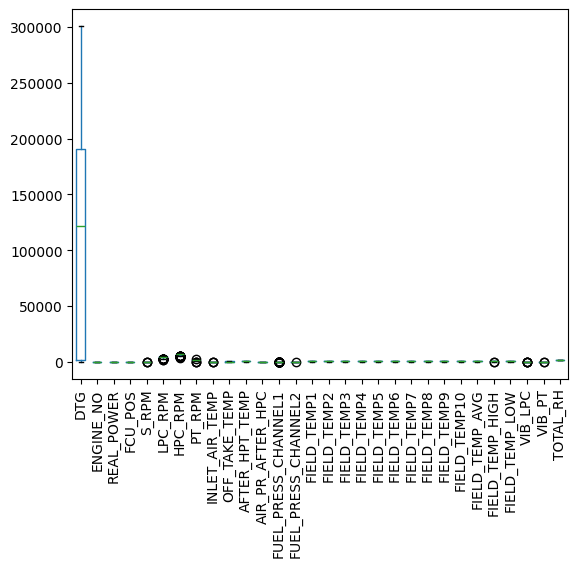

In [32]:
boxplot = df.boxplot(rot = 90, grid = False)

<Axes: xlabel='FCU_POS'>

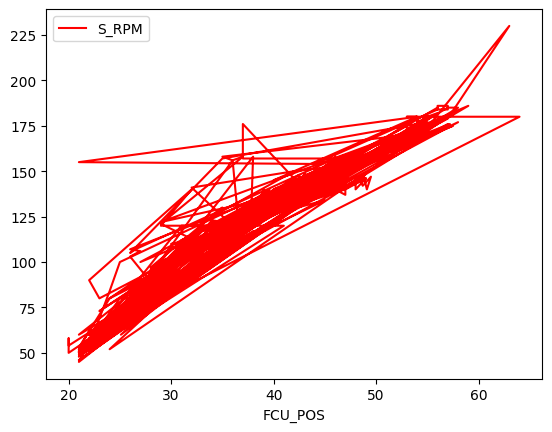

In [33]:
df.plot(x='FCU_POS',y='S_RPM',color = 'r')

# **Sorting the Dataset**

In [34]:
df_sort = df.sort_values('FCU_POS')
df_sort.reset_index(inplace=True)
df_sort.drop('index',inplace=True,axis=1)
df_sort

,DTG,ENGINE_NO,REAL_POWER,FCU_POS,S_RPM,LPC_RPM,HPC_RPM,PT_RPM,INLET_AIR_TEMP,OFF_TAKE_TEMP,...,FIELD_TEMP7,FIELD_TEMP8,FIELD_TEMP9,FIELD_TEMP10,FIELD_TEMP_AVG,FIELD_TEMP_HIGH,FIELD_TEMP_LOW,VIB_LPC,VIB_PT,TOTAL_RH
0,1100,2,0.05,20.0,58,2379,4624,657,30.0,237,...,310,287,292,275,283,310,267,1.4,0.1,1939.0
1,1000,2,0.05,20.0,54,2376,4625,645,30.0,239,...,310,287,292,275,284,310,267,1.4,0.1,1938.0
2,1200,2,0.04,20.0,50,2375,4622,649,30.0,236,...,310,287,292,275,284,310,267,1.4,0.1,1940.0
3,1200,2,0.05,21.0,48,2375,4640,575,29.0,235,...,308,287,292,276,283,308,264,1.3,0.1,1927.0
4,800,2,0.04,21.0,51,2338,4577,614,28.0,238,...,306,286,296,276,285,306,258,1.5,0.2,1923.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,1800,2,0.66,58.0,185,5538,7465,2200,33.0,350,...,544,549,529,553,538,561,516,2.6,0.1,1909.0
569,131830,3,0.64,58.0,177,5420,7428,2098,27.5,345,...,519,569,574,549,547,569,519,1.6,3.0,1601.0
570,1545,2,0.66,59.0,186,5580,7434,2212,32.0,346,...,522,549,551,554,548,564,522,2.5,0.1,1894.0
571,130930,3,0.71,63.0,230,5525,7511,2783,28.0,351,...,542,596,603,576,575,603,560,3.7,2.3,1595.0


# **Correlation Matrix and Heatmap**

In [35]:
corr_matrix = df.corr()
#print(corr_matrix)

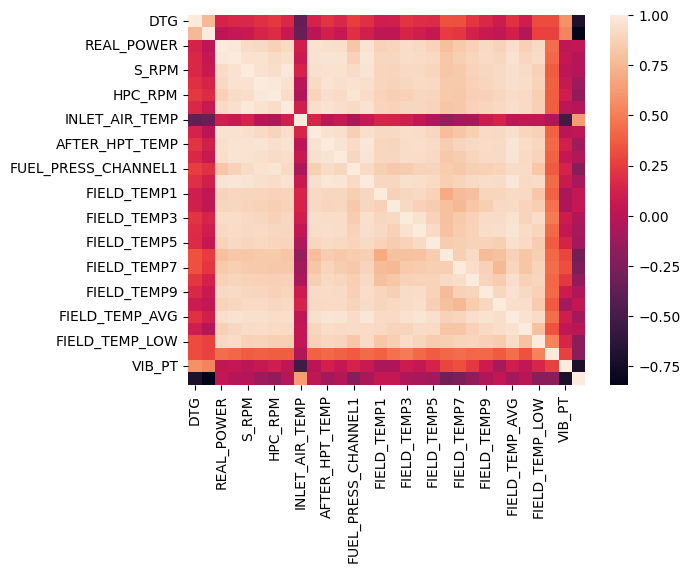

In [36]:
sns.heatmap(corr_matrix, annot = False)
plt.show()

<Axes: xlabel='FCU_POS', ylabel='S_RPM'>

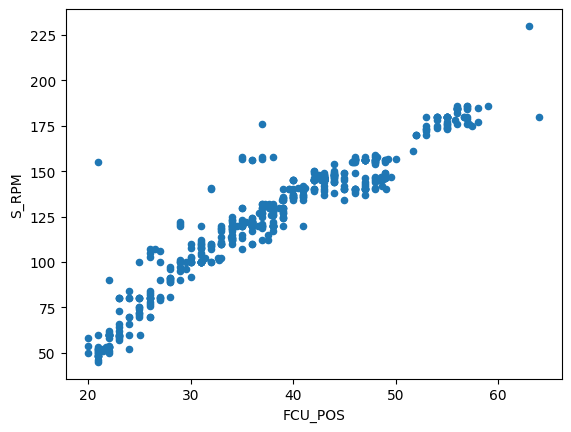

In [37]:
df.plot.scatter(x='FCU_POS',y='S_RPM')

<Axes: xlabel='FCU_POS', ylabel='FUEL_PRESS_CHANNEL1'>

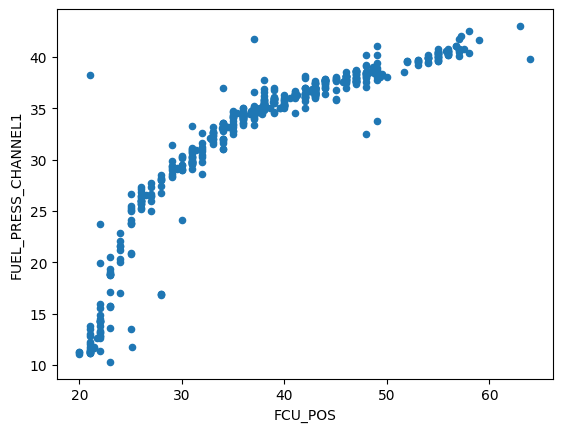

In [38]:
df.plot.scatter(x='FCU_POS',y='FUEL_PRESS_CHANNEL1')

<Axes: xlabel='FCU_POS', ylabel='LPC_RPM'>

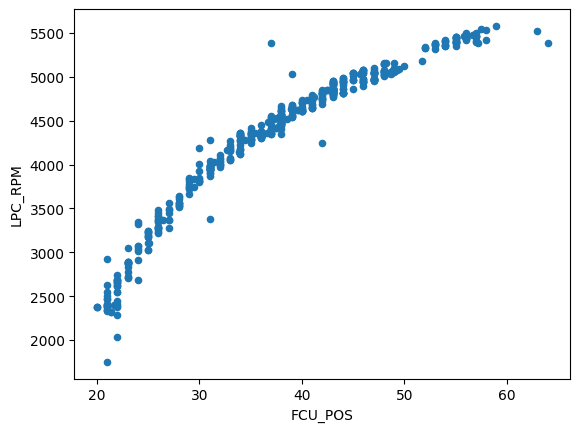

In [39]:
df.plot.scatter(x='FCU_POS',y='LPC_RPM')

<Axes: xlabel='FCU_POS', ylabel='HPC_RPM'>

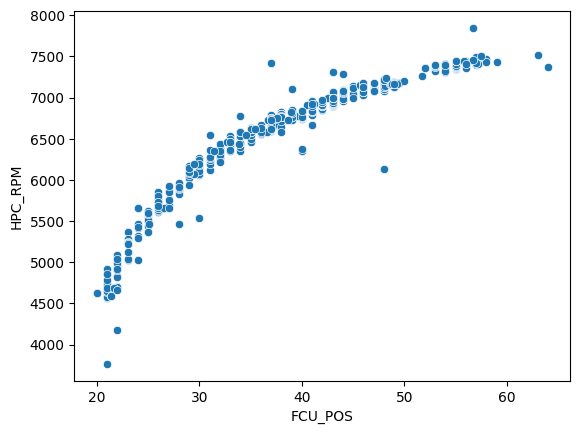

In [40]:
sns.scatterplot(x='FCU_POS',y='HPC_RPM',data=df)

# **Plots for Lever Position (Input) vs all output parameters**

In [41]:
from matplotlib import rc
from cycler import cycler

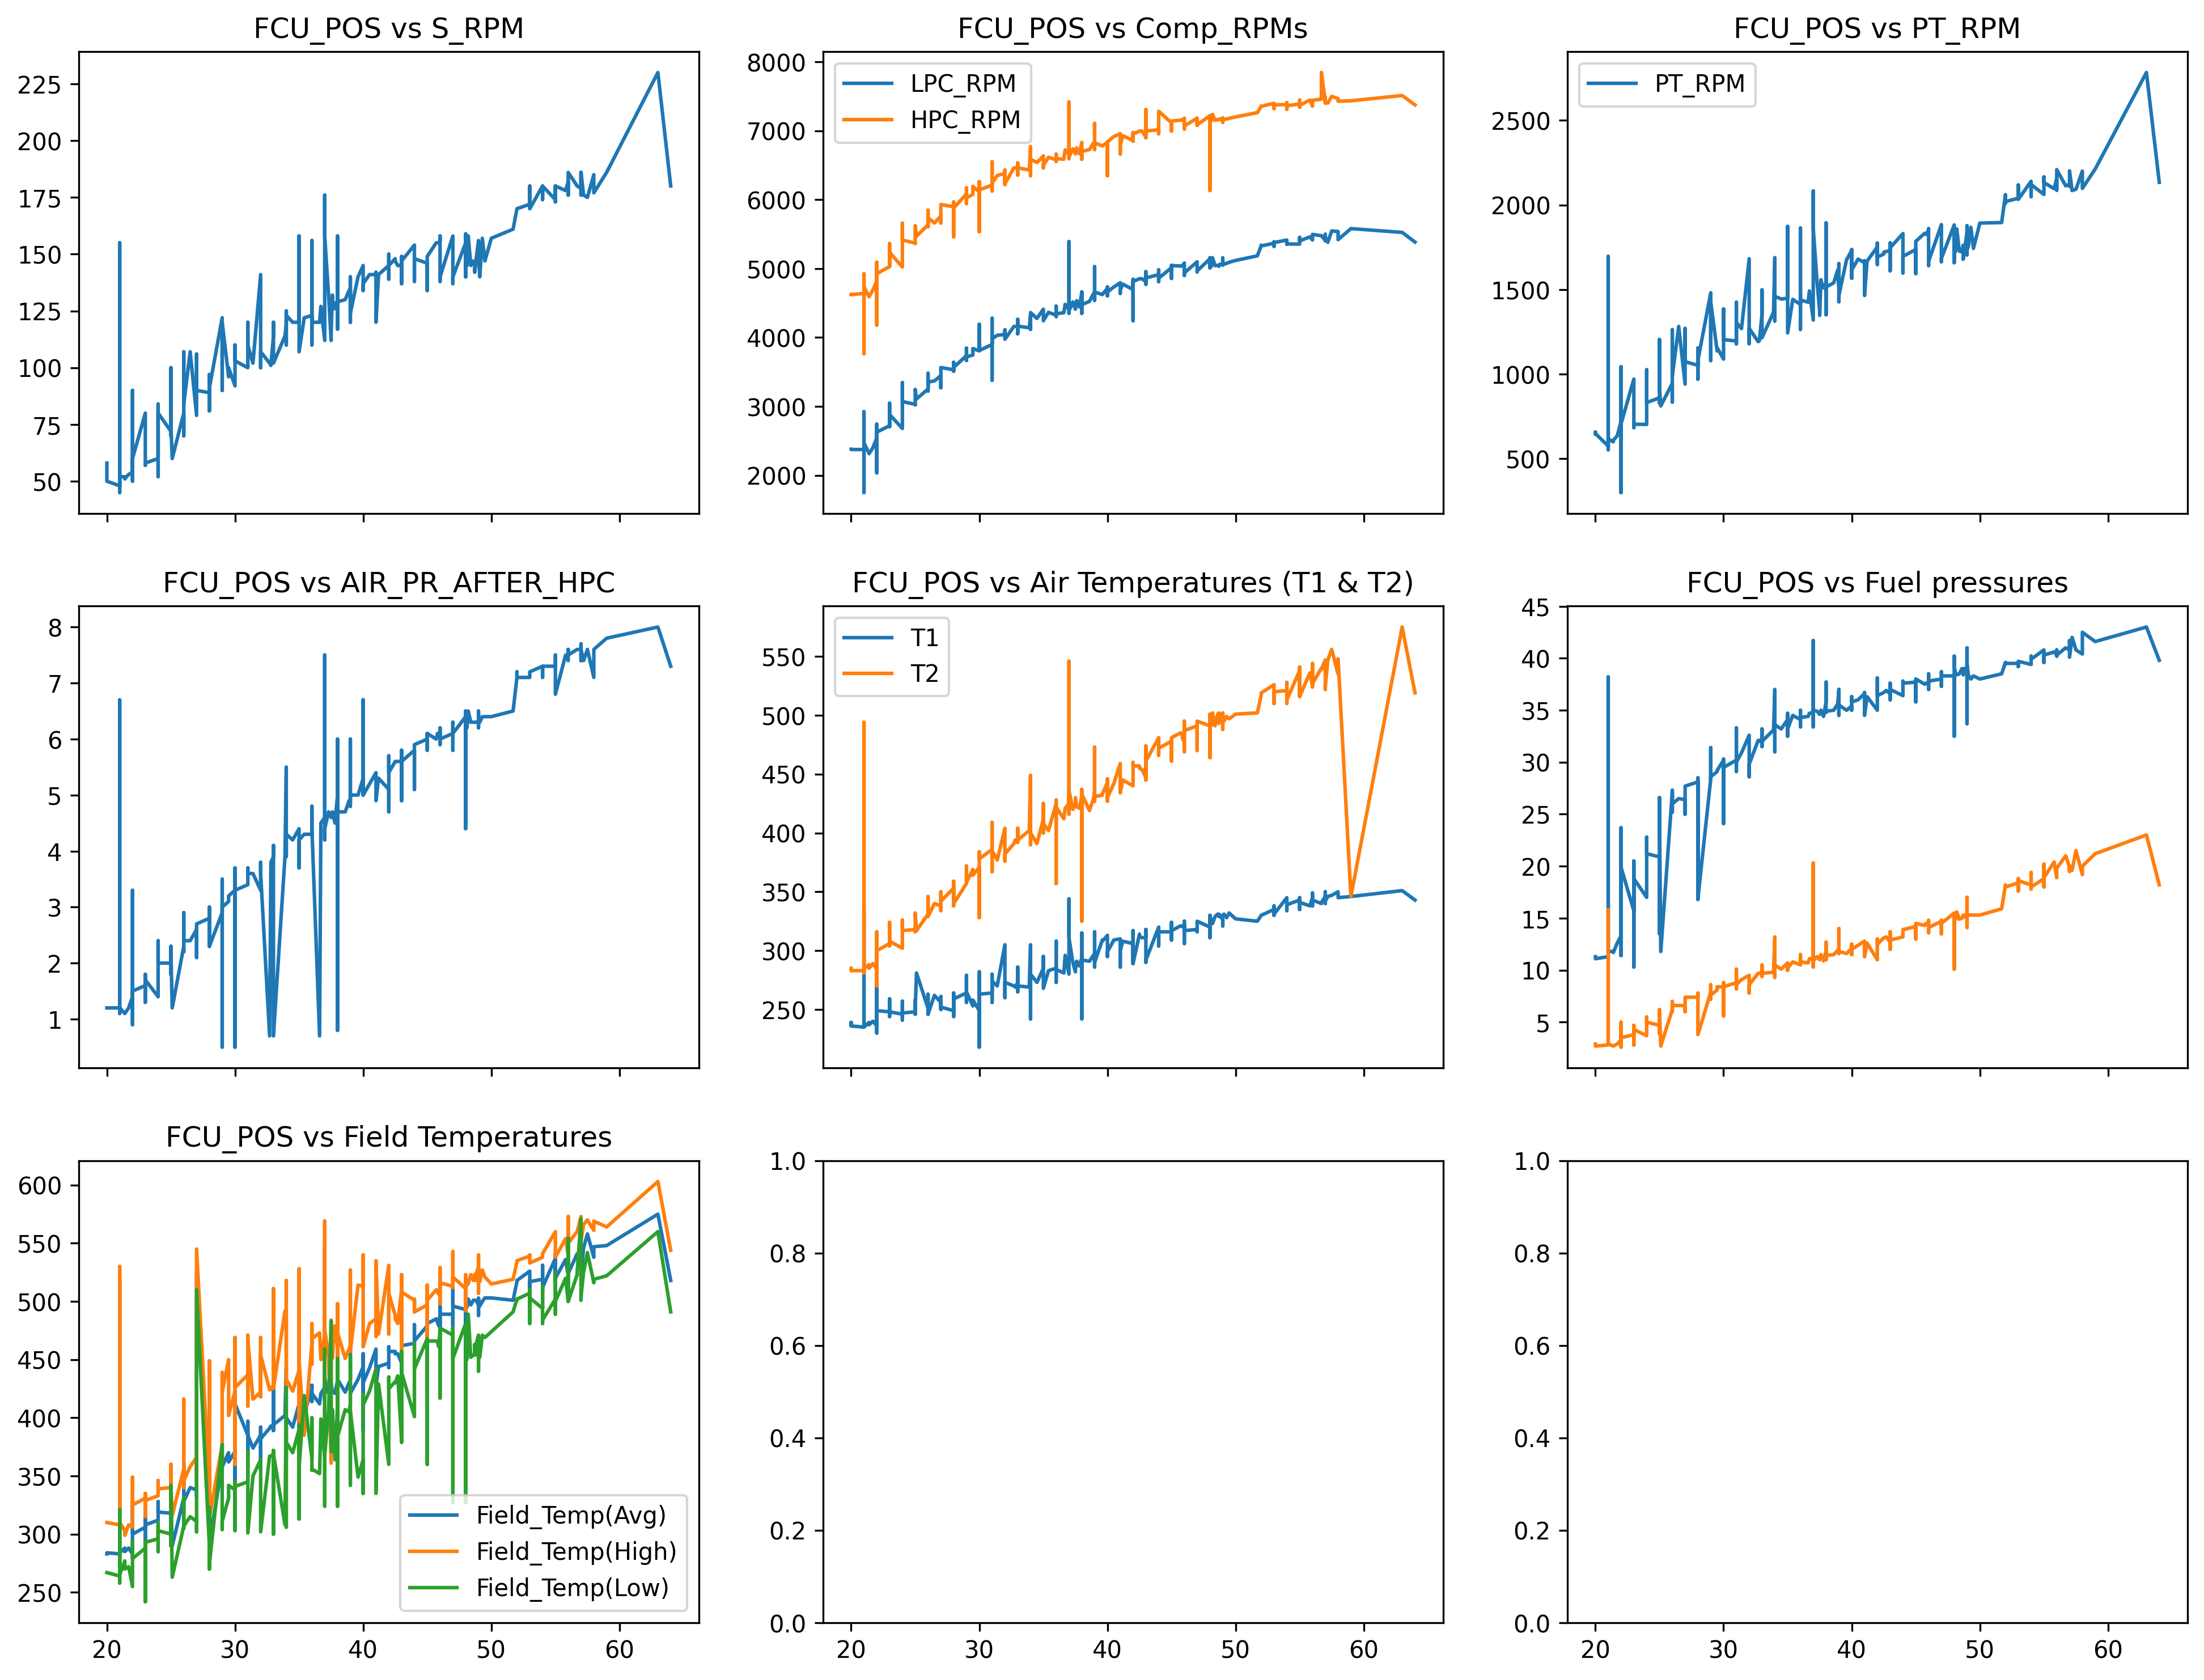

In [42]:
figure, axis = plt.subplots(3,3, sharex=True, figsize = (16,12), dpi=300)
# axis[0,0].scatter(df['FCU_POS'],df['S_RPM'])
axis[0,0].plot(df_sort['FCU_POS'],df_sort['S_RPM'])
axis[0,0].set_title('FCU_POS vs S_RPM')


# axis[0,1].scatter(df['FCU_POS'],df['LPC_RPM'])
# axis[0,1].scatter(df['FCU_POS'],df['HPC_RPM'])
axis[0,1].plot(df_sort['FCU_POS'],df_sort['LPC_RPM'], label = 'LPC_RPM')
axis[0,1].plot(df_sort['FCU_POS'],df_sort['HPC_RPM'], label = 'HPC_RPM')
axis[0,1].set_title('FCU_POS vs Comp_RPMs')
axis[0,1].legend()

# axis[0,2].scatter(df['FCU_POS'],df['PT_RPM'])
axis[0,2].plot(df_sort['FCU_POS'],df_sort['PT_RPM'],label = 'PT_RPM')
axis[0,2].set_title('FCU_POS vs PT_RPM')
axis[0,2].legend()

# axis[1,0].scatter(df['FCU_POS'],df['AIR_PR_AFTER_HPC'])
axis[1,0].plot(df_sort['FCU_POS'],df_sort['AIR_PR_AFTER_HPC'])
axis[1,0].set_title('FCU_POS vs AIR_PR_AFTER_HPC')

# axis[1,1].scatter(df['FCU_POS'],df['OFF_TAKE_TEMP'])
# axis[1,1].scatter(df['FCU_POS'],df['AFTER_HPT_TEMP'])
axis[1,1].plot(df_sort['FCU_POS'],df_sort['OFF_TAKE_TEMP'], label = 'T1')
axis[1,1].plot(df_sort['FCU_POS'],df_sort['AFTER_HPT_TEMP'], label = 'T2')
axis[1,1].set_title('FCU_POS vs Air Temperatures (T1 & T2)')
axis[1,1].legend()

# axis[1,2].scatter(df['FCU_POS'],df['FUEL_PRESS_CHANNEL1'])
# axis[1,2].scatter(df['FCU_POS'],df['FUEL_PRESS_CHANNEL2'])
axis[1,2].plot(df_sort['FCU_POS'],df_sort['FUEL_PRESS_CHANNEL1'])
axis[1,2].plot(df_sort['FCU_POS'],df_sort['FUEL_PRESS_CHANNEL2'])
axis[1,2].set_title('FCU_POS vs Fuel pressures')

# axis[2,0].scatter(df['FCU_POS'],df['FIELD_TEMP_AVG'])
# axis[2,0].scatter(df['FCU_POS'],df['FIELD_TEMP_HIGH'])
# axis[2,0].scatter(df['FCU_POS'],df['FIELD_TEMP_LOW'])
axis[2,0].plot(df_sort['FCU_POS'],df_sort['FIELD_TEMP_AVG'], label = 'Field_Temp(Avg)')
axis[2,0].plot(df_sort['FCU_POS'],df_sort['FIELD_TEMP_HIGH'], label = 'Field_Temp(High)')
axis[2,0].plot(df_sort['FCU_POS'],df_sort['FIELD_TEMP_LOW'], label = 'Field_Temp(Low)')
axis[2,0].set_title('FCU_POS vs Field Temperatures')
axis[2,0].legend()


Brief on the data based on the graphs above:

# **Multiple Inputs vs Multiple Outputs**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# from sklearn.model_selection import GridSearchCV

# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# import keras.utils
# from tensorflow.keras.constraints import max_norm

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [44]:
input_cols = ['FCU_POS', 'INLET_AIR_TEMP']
# output_cols = ['FCU_POS', 'S_RPM', 'PT_RPM','OFF_TAKE_TEMP', 'AFTER_HPT_TEMP', 'AIR_PR_AFTER_HPC','FIELD_TEMP_AVG', 'VIB_LPC', 'VIB_PT']
output_cols = ['LPC_RPM', 'HPC_RPM', 'AIR_PR_AFTER_HPC', 'FIELD_TEMP_AVG', 'AFTER_HPT_TEMP', 'OFF_TAKE_TEMP', 'PT_RPM', 'S_RPM']
required_cols = input_cols + output_cols
required_cols

['FCU_POS',
 'INLET_AIR_TEMP',
 'LPC_RPM',
 'HPC_RPM',
 'AIR_PR_AFTER_HPC',
 'FIELD_TEMP_AVG',
 'AFTER_HPT_TEMP',
 'OFF_TAKE_TEMP',
 'PT_RPM',
 'S_RPM']

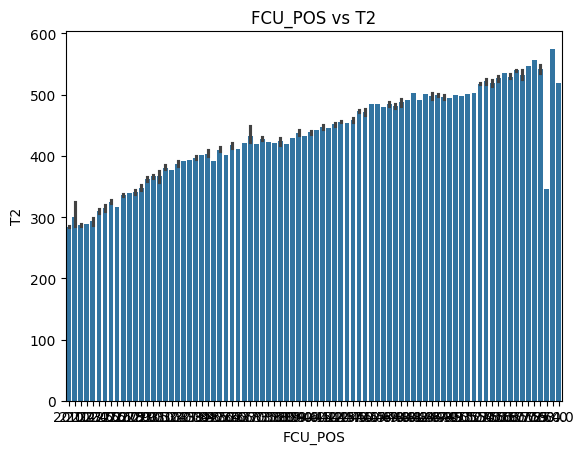

In [45]:
# bar plot of Fuel Flow vs Outputs
sns.barplot(x='FCU_POS', y='AFTER_HPT_TEMP', data=df)
plt.title('FCU_POS vs T2')
plt.xlabel('FCU_POS')
plt.ylabel('T2')
plt.show()

In [46]:
df.fillna(df.mean(), inplace=True)

In [47]:
X_tf = df[input_cols]
y_tf = df[output_cols]
X_tf.head()

,FCU_POS,INLET_AIR_TEMP
0,22.0,28.0
1,24.0,27.0
2,42.0,28.0
3,43.0,27.0
4,40.0,27.0


In [48]:
y_tf.head()

,LPC_RPM,HPC_RPM,AIR_PR_AFTER_HPC,FIELD_TEMP_AVG,AFTER_HPT_TEMP,OFF_TAKE_TEMP,PT_RPM,S_RPM
0,2547,4835,1.4,288,288,238,709,60
1,3015,5314,2.0,312,311,241,796,66
2,4751,6848,5.5,443,444,311,1679,140
3,4825,6909,5.7,445,445,310,1728,146
4,4606,6738,5.0,428,427,298,1612,136


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_tf,y_tf,test_size=0.2,random_state=2024)

In [51]:
#Feature Selection

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X_tf, y_tf)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Number of Features:  1
Selected Features:  [ True False]
Feature Ranking:  [1 2]


**Box Plot for Dataframe**

[Text(1, 0, 'LPC_RPM'),
 Text(2, 0, 'HPC_RPM'),
 Text(3, 0, 'AIR_PR_AFTER_HPC'),
 Text(4, 0, 'FIELD_TEMP_AVG'),
 Text(5, 0, 'AFTER_HPT_TEMP'),
 Text(6, 0, 'OFF_TAKE_TEMP'),
 Text(7, 0, 'PT_RPM'),
 Text(8, 0, 'S_RPM')]

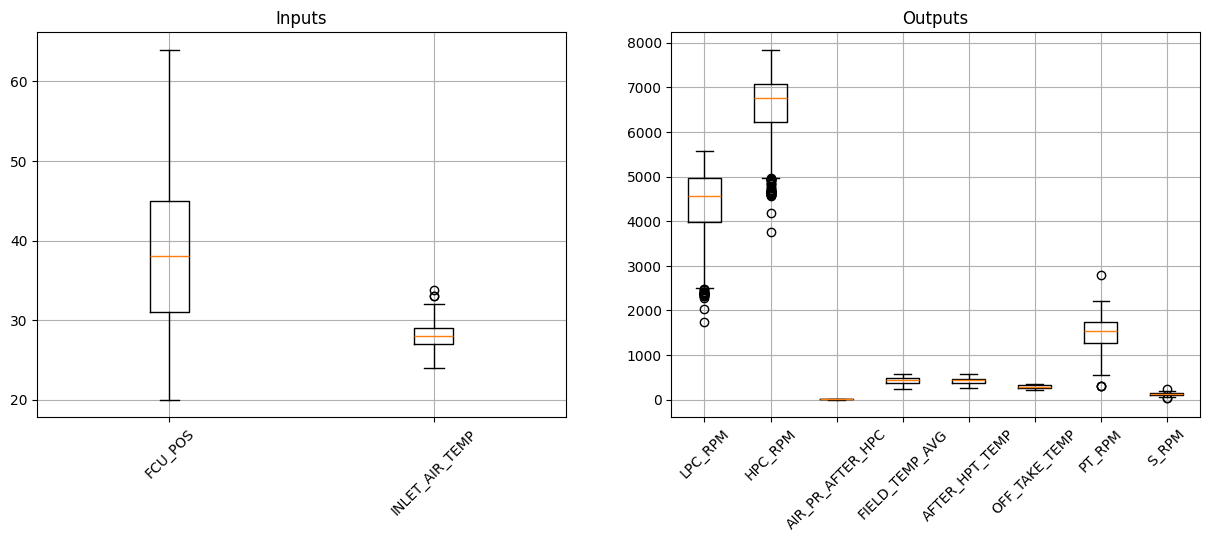

In [52]:
figure, axis = plt.subplots(1,2, figsize = (15,5))

axis[0].boxplot(X_tf)
axis[0].set_title('Inputs')
axis[0].grid()
axis[0].set_xticklabels(labels=input_cols,rotation = 45, fontsize=10)

axis[1].boxplot(y_tf)
axis[1].set_title('Outputs')
axis[1].grid()
axis[1].set_xticklabels(labels=output_cols,rotation = 45, fontsize=10)

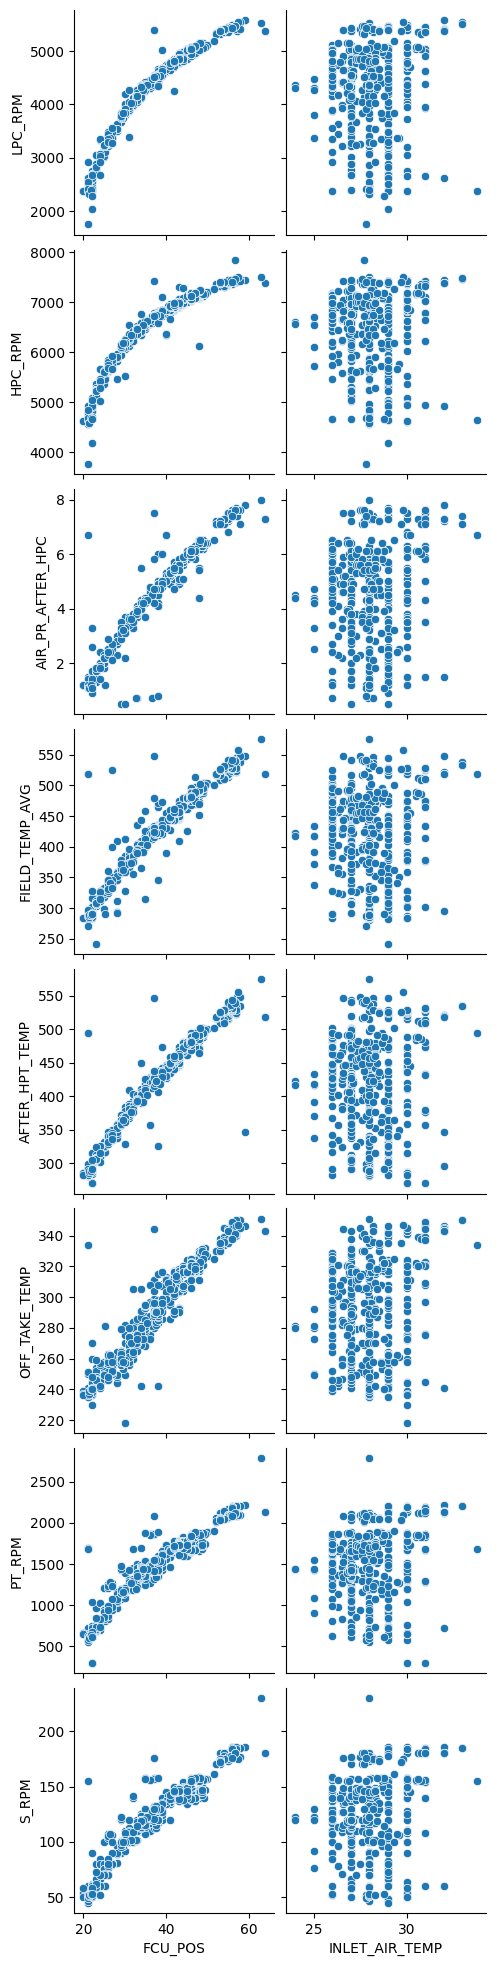

In [53]:
sns.pairplot(df,x_vars=input_cols,y_vars=output_cols)

In [54]:
# Normalising the inputs
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the input data
scaler.fit(X_test)

# Transform the data using the scaler
X_norm = scaler.transform(X_tf)
X_norm

array([[0.04651163, 0.42857143],
       [0.09302326, 0.28571429],
       [0.51162791, 0.42857143],
       ...,
       [0.8372093 , 0.4       ],
       [0.60465116, 0.34285714],
       [0.60465116, 0.4       ]])

In [58]:
train_x, test_x, train_y, test_y = train_test_split(X_tf,y_tf,test_size=0.2,random_state=2024)
# print the shape of train x and train y
print('The shape of train x is: ', train_x.shape)
print('The shape of train y is: ', train_y.shape)
print('The shape of test x is: ', test_x.shape)
print('The shape of test y is: ', test_y.shape)

# type(train_x)

The shape of train x is:  (458, 2)
The shape of train y is:  (458, 8)
The shape of test x is:  (115, 2)
The shape of test y is:  (115, 8)


In [43]:
# # import standard scaler from sklearn
# from sklearn.preprocessing import MinMaxScaler

# # Create a StandardScaler object
# scaler = MinMaxScaler()

# # Fit the scaler to the data
# scaler.fit(df[required_cols])

# # Transform the data using the scaler
# df[required_cols] = scaler.transform(df[required_cols])

In [44]:
# train_x, test_x, train_y, test_y = train_test_split(df[input_cols],df[output_cols],test_size=0.2,random_state=2024)
# test_y.head()

In [59]:
def report_metric(test,pred):
    r2=r2_score(test, pred)
    print('Overall R^2 score: %.3f' % r2)
    print()
    for index, col in enumerate(test.columns):
      r2 = r2_score(test[col], pred[:, index])
      rmse = np.sqrt(mean_squared_error(test[col], pred[:, index]))
      print(f"{col}: \t",'r2_score: %.3f' % r2, '\trmse: %.3f' % rmse)
    print()

In [61]:
def alert_check(test,pred):
  j,count = 0,0
  for i, row in test.iterrows():
    if ((test.iloc[j]['AFTER_HPT_TEMP']>(1.05*pred[j][4]))):
      print('Paramter out of predicted limit at index:',i)
      count+=1
    j+=1
  print('Total number of out of limit values:', count)

In [112]:
def plot_models(y_test,y_pred):
  plt.figure()  # Set dpi = 300 later for presentation/ thesis

  plt.scatter(X_test['FCU_POS'], y_test['LPC_RPM'], label = 'LPC_RPM')
  plt.scatter(X_test['FCU_POS'], y_test['HPC_RPM'], label = 'HPC_RPM')
  plt.scatter(X_test['FCU_POS'], y_test['AIR_PR_AFTER_HPC'], label = 'AIR_PR_AFTER_HPC')
  plt.scatter(X_test['FCU_POS'], y_test['FIELD_TEMP_AVG'], label = 'FIELD_TEMP_AVG')
  plt.scatter(X_test['FCU_POS'], y_test['AFTER_HPT_TEMP'], label = 'AFTER_HPT_TEMP')
  plt.scatter(X_test['FCU_POS'], y_test['OFF_TAKE_TEMP'], label = 'OFF_TAKE_TEMP')
  plt.scatter(X_test['FCU_POS'], y_test['PT_RPM'], label = 'PT_RPM')
  plt.scatter(X_test['FCU_POS'], y_test['S_RPM'], label = 'S_RPM')

  plt.scatter(X_test['FCU_POS'], y_pred[:,0], label = 'LPC_RPM',color='r',marker = '+')
  plt.scatter(X_test['FCU_POS'], y_pred[:,1], label = 'HPC_RPM',color='r',marker = '+')
  plt.scatter(X_test['FCU_POS'], y_pred[:,2], label = 'AIR_PR_AFTER_HPC',color='r',marker = '+')
  plt.scatter(X_test['FCU_POS'], y_pred[:,3], label = 'FIELD_TEMP_AVG',color='r',marker = '+')
  plt.scatter(X_test['FCU_POS'], y_pred[:,4], label = 'AFTER_HPT_TEMP',color='r',marker = '+')
  plt.scatter(X_test['FCU_POS'], y_pred[:,5], label = 'OFF_TAKE_TEMP',color='r',marker = '+')
  plt.scatter(X_test['FCU_POS'], y_pred[:,6], label = 'PT_RPM',color='r',marker = '+')
  plt.scatter(X_test['FCU_POS'], y_pred[:,7], label = 'S_RPM',color='r',marker = '+')


  plt.title('FCU_POS vs Outputs')
  plt.xlabel('FCU_POS')
  plt.ylabel('Outputs')
  plt.grid()
  plt.legend(bbox_to_anchor=(1,1), loc='upper left')
  plt.show()

  figure, axis = plt.subplots(4,2, sharex=True, figsize = (20,27)) # set dpi=300 later for presentation/ thesis
  figure.supxlabel('FCU_POS', fontsize=20)


  axis[0,0].scatter(X_test['FCU_POS'], y_test['LPC_RPM'],label='Actual')
  axis[0,0].scatter(X_test['FCU_POS'], y_pred[:,0],label='Prediction',color='r')
  axis[0,0].set_title('FCU_POS vs LPC_RPM', size=20)
  axis[0,0].set_xlabel('R2 Score: %.3f' % r2_score(y_test['LPC_RPM'], y_pred[:,0]), fontsize=15)
  axis[0,0].set_ylabel('LPC_RPM', fontsize=15)
  axis[0,0].tick_params(axis='both', labelsize=15)
  axis[0,0].grid()
  axis[0,0].legend(fontsize=15)

  axis[0,1].scatter(X_test['FCU_POS'], y_test['HPC_RPM'],label='Actual')
  axis[0,1].scatter(X_test['FCU_POS'], y_pred[:,1],label='Prediction',color='r')
  axis[0,1].set_title('FCU_POS vs HPC_RPM', size=20)
  axis[0,1].set_xlabel('R2 Score: %.3f' % r2_score(y_test['HPC_RPM'], y_pred[:,1]), fontsize=15)
  axis[0,1].set_ylabel('HPC_RPM', fontsize=15)
  axis[0,1].tick_params(axis='both', labelsize=15)
  axis[0,1].grid()
  axis[0,1].legend(fontsize=15)

  axis[1,0].scatter(X_test['FCU_POS'], y_test['AIR_PR_AFTER_HPC'],label='Actual')
  axis[1,0].scatter(X_test['FCU_POS'], y_pred[:,2],label='Prediction',color='r')
  axis[1,0].set_title('FCU_POS vs AIR_PR_AFTER_HPC', size=20)
  axis[1,0].set_xlabel('R2 Score: %.3f' % r2_score(y_test['AIR_PR_AFTER_HPC'], y_pred[:,2]), fontsize=15)
  axis[1,0].set_ylabel('AIR_PR_AFTER_HPC', fontsize=15)
  axis[1,0].tick_params(axis='both', labelsize=15)
  axis[1,0].grid()
  axis[1,0].legend(fontsize=15)

  axis[1,1].scatter(X_test['FCU_POS'], y_test['FIELD_TEMP_AVG'],label='Actual')
  axis[1,1].scatter(X_test['FCU_POS'], y_pred[:,3],label='Prediction',color='r')
  axis[1,1].set_title('FCU_POS vs FIELD_TEMP_AVG', size=20)
  axis[1,1].set_xlabel('R2 Score: %.3f' % r2_score(y_test['FIELD_TEMP_AVG'], y_pred[:,3]), fontsize=15)
  axis[1,1].set_ylabel('FIELD_TEMP_AVG', fontsize=15)
  axis[1,1].tick_params(axis='both', labelsize=15)
  axis[1,1].grid()
  axis[1,1].legend(fontsize=15)

  axis[2,0].scatter(X_test['FCU_POS'], y_test['AFTER_HPT_TEMP'],label='Actual')
  axis[2,0].scatter(X_test['FCU_POS'], y_pred[:,4],label='Prediction',color='r')
  axis[2,0].set_title('FCU_POS vs AFTER_HPT_TEMP', size=20)
  axis[2,0].set_xlabel('R2 Score: %.3f' % r2_score(y_test['AFTER_HPT_TEMP'], y_pred[:,4]), fontsize=15)
  axis[2,0].set_ylabel('AFTER_HPT_TEMP', fontsize=15)
  axis[2,0].tick_params(axis='both', labelsize=15)
  axis[2,0].grid()
  axis[2,0].legend(fontsize=15)

  axis[2,1].scatter(X_test['FCU_POS'], y_test['OFF_TAKE_TEMP'],label='Actual')
  axis[2,1].scatter(X_test['FCU_POS'], y_pred[:,5],label='Prediction',color='r')
  axis[2,1].set_title('FCU_POS vs OFF_TAKE_TEMP', size=20)
  axis[2,1].set_xlabel('R2 Score: %.3f' % r2_score(y_test['OFF_TAKE_TEMP'], y_pred[:,5]), fontsize=15)
  axis[2,1].set_ylabel('OFF_TAKE_TEMP', fontsize=15)
  axis[2,1].tick_params(axis='both', labelsize=15)
  axis[2,1].grid()
  axis[2,1].legend(fontsize=15)

  axis[3,0].scatter(X_test['FCU_POS'], y_test['PT_RPM'],label='Actual')
  axis[3,0].scatter(X_test['FCU_POS'], y_pred[:,6],label='Prediction',color='r')
  axis[3,0].set_title('FCU_POS vs PT_RPM', size=20)
  axis[3,0].set_xlabel('R2 Score: %.3f' % r2_score(y_test['PT_RPM'], y_pred[:,6]), fontsize=15)
  axis[3,0].set_ylabel('PT_RPM', fontsize=15)
  axis[3,0].tick_params(axis='both', labelsize=15)
  axis[3,0].grid()
  axis[3,0].legend(fontsize=15)

  axis[3,1].scatter(X_test['FCU_POS'], y_test['S_RPM'],label='Actual')
  axis[3,1].scatter(X_test['FCU_POS'], y_pred[:,7],label='Prediction',color='r')
  axis[3,1].set_title('FCU_POS vs S_RPM', size=20)
  axis[3,1].set_xlabel('R2 Score: %.3f' % r2_score(y_test['S_RPM'], y_pred[:,7]), fontsize=15)
  axis[3,1].set_ylabel('S_RPM', fontsize=15)
  axis[3,1].tick_params(axis='both', labelsize=15)
  axis[3,1].grid()
  axis[3,1].legend(fontsize=15)


# **Baseline Linear Regression**

In [64]:
# import the linear regression model from sklearn
from sklearn.linear_model import LinearRegression

# create a linear regression object
lr = LinearRegression()

# perform cross validation using cross_val_score
from sklearn.model_selection import cross_validate

# perform 3 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
scores = cross_validate(lr, train_x, train_y, cv=3, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
print('The mean of r2 scores is: ', scores['test_r2'].mean())

# mean of r2
lr_mean_r2 = scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
lr_mse = scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
lr_mean_rmse = np.sqrt(-lr_mse)

# print the r2 and rmse error
print('The r2 score is: ', scores['test_r2'].mean())
print('The rmse score is: ', lr_mean_rmse)


The mean of r2 scores is:  0.8952531188227976
The r2 score is:  0.8952531188227976
The rmse score is:  142.82822792513713


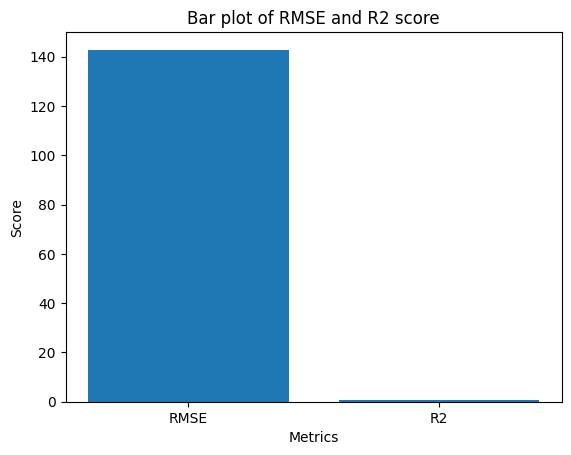

In [65]:
# plot a bar plot of RMSE and R2 score
plt.bar(['RMSE', 'R2'], [lr_mean_rmse, lr_mean_r2])
plt.title('Bar plot of RMSE and R2 score')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

In [50]:
# results_multi = pd.DataFrame(['Linear Regression',r20,r21,r22,r23,r24,r25]).transpose()
# results_multi.columns = ['R2 Score for:','GT_shaft_torque','GT Rate of Revs','GT Comp Outlet Air Temp (T2)','GT Comp Outlet Air Press (P2)','HPT Exit Temp','GT Exhaust Gas Press']
# results_multi

# **Decision Tree Regressor**

In [66]:
# import decision tree regressor from sklearn
from sklearn.tree import DecisionTreeRegressor

# create a decision tree regressor object
dt = DecisionTreeRegressor(random_state=0)

# perform 5 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
dt_scores = cross_validate(dt, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
dt_mean_r2 = dt_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
dt_mse = dt_scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
dt_rmse = np.sqrt(-dt_mse)

# print the r2 and rmse error
print('The r2 score for decision tree is: ', dt_mean_r2)
print('The rmse score for decision tree is: ', dt_rmse)

The r2 score for decision tree is:  0.9173819173064091
The rmse score for decision tree is:  80.83504222654561


# **Random Forest Regressor**

In [67]:
# import random forest regressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# create a random forest regressor object
rf = RandomForestRegressor(random_state=0,n_estimators=30)

# fit the training data
rf.fit(train_x, train_y)

# perform 5 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
rf_scores = cross_validate(rf, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
rf_mean_r2 = rf_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
rf_mse = rf_scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
rf_rmse = np.sqrt(-rf_mse)

# print the r2 and rmse error
print('The r2 score for random forest is: ', rf_mean_r2)
print('The rmse score for random forest is: ', rf_rmse)

The r2 score for random forest is:  0.9289581019462407
The rmse score for random forest is:  74.70911975403803


# **Lasso Regressor**

In [68]:
# import laso regressor from sklearn
from sklearn.linear_model import Lasso

# create a lasso regressor object
lasso = Lasso(random_state=0, alpha=0.1)

# perform 5 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
lasso_scores = cross_validate(lasso, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
lasso_mean_r2 = lasso_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
lasso_mse = lasso_scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
lasso_rmse = np.sqrt(-lasso_mse)

# print the r2 and rmse error
print('The r2 score for lasso is: ', lasso_mean_r2)
print('The rmse score for lasso is: ', lasso_rmse)

The r2 score for lasso is:  0.8893467516799216
The rmse score for lasso is:  145.37508584025176


# **Ridge Regressor**

In [69]:
# ridge regression
from sklearn.linear_model import Ridge

# create a ridge regressor object
ridge = Ridge(random_state=0, alpha=0.5)

# perform 5 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
ridge_scores = cross_validate(ridge, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
ridge_mean_r2 = ridge_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
ridge_mse = ridge_scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
ridge_rmse = np.sqrt(-ridge_mse)

# print the r2 and rmse error
print('The r2 score for ridge is: ', ridge_mean_r2)
print('The rmse score for ridge is: ', ridge_rmse)

The r2 score for ridge is:  0.8890150457236686
The rmse score for ridge is:  145.37462595169873


# **Elastic Net Regressor**

In [70]:
# import elastic net regressor from sklearn
from sklearn.linear_model import ElasticNet

# create a elastic net regressor object
elastic_net = ElasticNet(random_state=0)

# perform 5 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
elastic_net_scores = cross_validate(elastic_net, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
elastic_net_mean_r2 = elastic_net_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
elastic_net_mse = elastic_net_scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
elastic_net_rmse = np.sqrt(-elastic_net_mse)

# print the r2 and rmse error
print('The r2 score for elastic net is: ', elastic_net_mean_r2)
print('The rmse score for elastic net is: ', elastic_net_rmse)

The r2 score for elastic net is:  0.8894564165165952
The rmse score for elastic net is:  145.60487902802717


# **Bagging Regressor**

In [71]:
# import bagging regressor from sklearn
from sklearn.ensemble import BaggingRegressor

# create a bagging regressor object
bagging = BaggingRegressor(random_state=0, n_estimators=30)

# perform 5 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
bagging_scores = cross_validate(bagging, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
bagging_mean_r2 = bagging_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
bagging_mse = bagging_scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
bagging_rmse = np.sqrt(-bagging_mse)

# print the r2 and rmse error
print('The r2 score for bagging is: ', bagging_mean_r2)
print('The rmse score for bagging is: ', bagging_rmse)

The r2 score for bagging is:  0.9288353334066928
The rmse score for bagging is:  74.85394866928849


# **KNN Regressor**

In [72]:
# import KNN regressor from sklearn
from sklearn.neighbors import KNeighborsRegressor

# create a knn regressor object
knn = KNeighborsRegressor()

# perform 5 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
knn_scores = cross_validate(knn, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
knn_mean_r2 = knn_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
knn_mse = knn_scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
knn_rmse = np.sqrt(-knn_mse)

# print the r2 and rmse error
print('The r2 score for knn is: ', knn_mean_r2)
print('The rmse score for knn is: ', knn_rmse)

The r2 score for knn is:  0.930608549909486
The rmse score for knn is:  74.62873831494734


# **Extra Tree Regressor**

In [73]:
# import extra tree regressor from sklearn
from sklearn.ensemble import ExtraTreesRegressor

# create a extra tree regressor object
et = ExtraTreesRegressor(random_state=0,n_estimators=30)

# perform 5 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
et_scores = cross_validate(et, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
et_mean_r2 = et_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
et_mse = et_scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
et_rmse = np.sqrt(-et_mse)

# print the r2 and rmse error
print('The r2 score for extra tree is: ', et_mean_r2)
print('The rmse score for extra tree is: ', et_rmse)

The r2 score for extra tree is:  0.9220127228379132
The rmse score for extra tree is:  79.23955111393104


# **XGBoost**

In [75]:
# import XGBoost regressor from XGBoost library
import xgboost as xgb

# create an XGBoost regressor object
xgb_reg = xgb.XGBRegressor(random_state=0, n_estimators=30, learning_rate=0.4)

# # fit the training data
# xgb_reg.fit(train_x, train_y)

# Perform 5-fold cross-validation with r2 and neg_mean_squared_error as the scoring parameters
xgb_scores = cross_validate(xgb_reg, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
xgb_mean_r2 = xgb_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
xgb_mse = xgb_scores['test_neg_mean_squared_error'].mean()

# Get RMSE by taking the square root of MSE
xgb_rmse = np.sqrt(-xgb_mse)

# Print the r2 and RMSE scores for XGBoost
print('The r2 score for XGBoost is: ', xgb_mean_r2)
print('The RMSE score for XGBoost is: ', xgb_rmse)


The r2 score for XGBoost is:  0.9125295345235293
The RMSE score for XGBoost is:  81.85367479304357


# Comparing the RMSE and the r2 score of all the models to see which model performs the best.

/var/folders/3w/lb2b87552d5dc9bvztm53xk40000gn/T/ipykernel_1292/836328265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


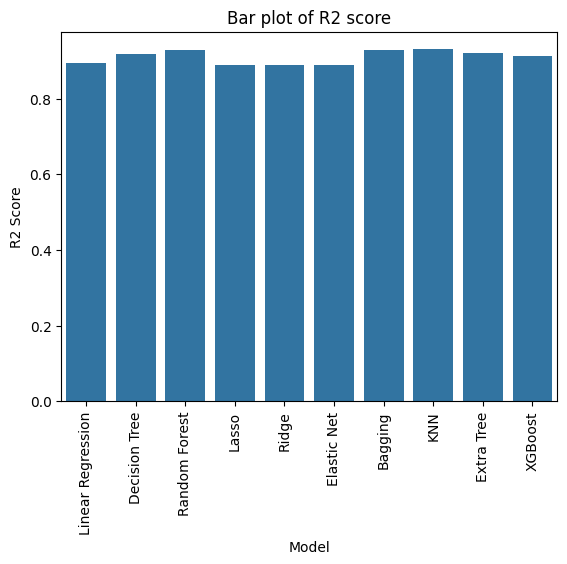

/var/folders/3w/lb2b87552d5dc9bvztm53xk40000gn/T/ipykernel_1292/836328265.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


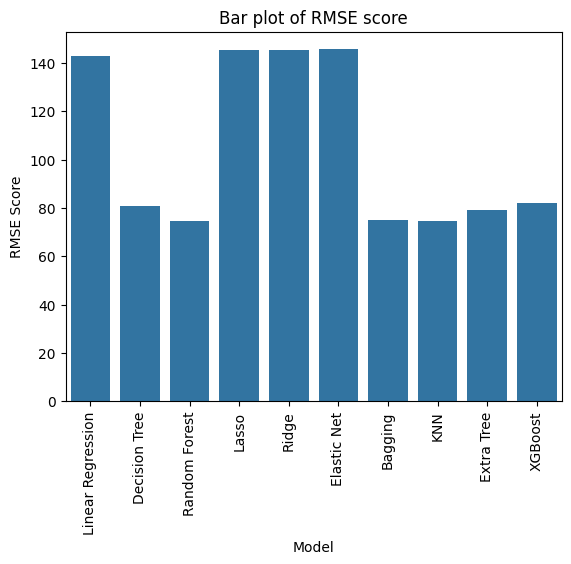

In [76]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Lasso', 'Ridge', 'Elastic Net', 'Bagging', 'KNN', 'Extra Tree','XGBoost']
r2_scores = [lr_mean_r2, dt_mean_r2, rf_mean_r2, lasso_mean_r2, ridge_mean_r2, elastic_net_mean_r2,  bagging_mean_r2, knn_mean_r2, et_mean_r2,xgb_mean_r2]
rmse_scores = [lr_mean_rmse, dt_rmse, rf_rmse, lasso_rmse, ridge_rmse, elastic_net_rmse,  bagging_rmse, knn_rmse, et_rmse,xgb_rmse]

# lets create a dataframe to store the scores
scores_df = pd.DataFrame({'Model': model_names, 'R2 Score': r2_scores, 'RMSE Score': rmse_scores})

# print the dataframe
scores_df.head(5)

# use sns to plot the bar plot of r2 score
ax1 = sns.barplot(x='Model', y='R2 Score', data=scores_df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.title('Bar plot of R2 score')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.savefig('Bar_plot_of_R2_score.png')
plt.show()

# use sns to plot the bar plot of r2 score
ax1 = sns.barplot(x='Model', y='RMSE Score', data=scores_df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.title('Bar plot of RMSE score')
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.savefig('Bar_plot_of_RMSE_score.png')
plt.show()


In [77]:
scores_df

,Model,R2 Score,RMSE Score
0,Linear Regression,0.895253,142.828228
1,Decision Tree,0.917382,80.835042
2,Random Forest,0.928958,74.709120
3,Lasso,0.889347,145.375086
4,Ridge,0.889015,145.374626
5,Elastic Net,0.889456,145.604879
6,Bagging,0.928835,74.853949
7,KNN,0.930609,74.628738
8,Extra Tree,0.922013,79.239551
9,XGBoost,0.912530,81.853675


Get the top 3 performing models

In [78]:
# sort the dataframe by r2 score
scores_new_df = scores_df.sort_values(by='R2 Score', ascending=False)

# pick the top 3 models
print('The top 4 models are: \n', scores_new_df.head(4))

The top 4 models are: 
            Model  R2 Score  RMSE Score
7            KNN  0.930609   74.628738
2  Random Forest  0.928958   74.709120
6        Bagging  0.928835   74.853949
8     Extra Tree  0.922013   79.239551


# Cross Validation on top 3 models

The r2 score for bagging is:  0.9288353334066928
The rmse score for bagging is:  74.85394866928849
The r2 score for random forest is:  0.9289581019462407
The rmse score for random forest is:  74.70911975403803
The r2 score for XGBoost is:  0.9125295345235293
The RMSE score for XGBoost is:  81.85367479304357


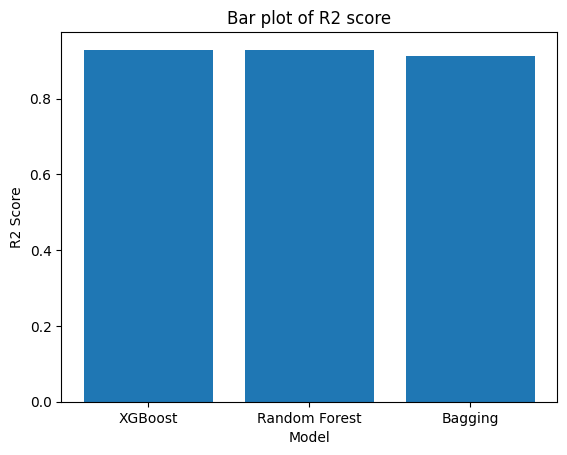

In [79]:
# import bagging regressor from sklearn
from sklearn.ensemble import BaggingRegressor

# create a bagging regressor object
bagging = BaggingRegressor(random_state=0, n_estimators=30)

# perform 5 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
bagging_scores = cross_validate(bagging, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
bagging_mean_r2 = bagging_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
bagging_mse = bagging_scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
bagging_rmse = np.sqrt(-bagging_mse)

# print the r2 and rmse error
print('The r2 score for bagging is: ', bagging_mean_r2)
print('The rmse score for bagging is: ', bagging_rmse)


# import random forest regressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# create a random forest regressor object
rf = RandomForestRegressor(random_state=0,n_estimators=30)

# perform 5 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
rf_scores = cross_validate(rf, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
rf_mean_r2 = rf_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
rf_mse = rf_scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
rf_rmse = np.sqrt(-rf_mse)

# print the r2 and rmse error
print('The r2 score for random forest is: ', rf_mean_r2)
print('The rmse score for random forest is: ', rf_rmse)


# import XGBoost regressor from XGBoost library
import xgboost as xgb

# create an XGBoost regressor object
xgb_reg = xgb.XGBRegressor(random_state=0, n_estimators=30, learning_rate=0.4)

# # fit the training data
# xgb_reg.fit(train_x, train_y)

# Perform 5-fold cross-validation with r2 and neg_mean_squared_error as the scoring parameters
xgb_scores = cross_validate(xgb_reg, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
xgb_mean_r2 = xgb_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
xgb_mse = xgb_scores['test_neg_mean_squared_error'].mean()

# Get RMSE by taking the square root of MSE
xgb_rmse = np.sqrt(-xgb_mse)

# Print the r2 and RMSE scores for XGBoost
print('The r2 score for XGBoost is: ', xgb_mean_r2)
print('The RMSE score for XGBoost is: ', xgb_rmse)


# plot the bar plot of r2 score of decision tree, random forest and bagging
plt.bar(['XGBoost', 'Random Forest', 'Bagging'], [bagging_mean_r2, rf_mean_r2, xgb_mean_r2])
plt.title('Bar plot of R2 score')
plt.xlabel('Model')
plt.ylabel('R2 Score')
# plt.savefig('Bar_plot_of_R2_score.png')
plt.show()


### Randomized Search CV for RandomForestRegressor

We will perform a grid search on the random forest regressor to find the best parameters for the model. we will use the `RandomizedSearchCV()` function . The parameters that we will tune are:
- Bootstrap: true, false
- Max_depth: 10-110,
- number of bins 10,11
- Max_features: auto, sqrt
- Min_samples_split: 2,5,10
- Min_samples_leaf: 1,2,4
- N_estimators: 200 – 2000

In [80]:
def rf_reg():
  # Generate a gridsearch object with regresion tree with the above parameters
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import RandomizedSearchCV

  n_estimators = np.arange(200, 2000, 100).astype(int)

  # Define the parameter distributions
  param_dist = {
      'bootstrap': [True, False],
      'max_depth': [10,11],
      'max_features': ['auto', 'sqrt'],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'n_estimators': n_estimators
  }

  # Create a random forest regressor model
  model = RandomForestRegressor()

  # Create a randomized search CV object
  search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1)

  # Fit the randomized search CV object on the data
  search.fit(train_x, train_y)

  # Print the best parameters and score
  print("Best parameters:", search.best_params_)
  print("Best score:", search.best_score_)
  return(search.best_estimator_)

### Randomized Search CV for XGBoostRegressor

We will perform a grid search on the xgboost regressor to find the best parameters for the model. we will use the `RandomizedSearchCV()` function . The parameters that we will tune are:
- n_estimators: np.arange(200, 2000, 100).astype(int)
- max_depth: 10, 11
- learning_rate: 0.01, 0.1, 0.2, 0.3, 0.4
- subsample: 0.8, 0.9, 1.0
- colsample_bytree: 0.8, 0.9, 1.0
- gamma: 0, 1, 2
- min_child_weight: 1, 2, 3

In [81]:
def xgb_reg():
  import xgboost as xgb
  from sklearn.model_selection import RandomizedSearchCV

  n_estimators = np.arange(200, 2000, 100).astype(int)

  # Define the parameter distributions
  param_dist = {
      'n_estimators': n_estimators,
      'max_depth': [10, 11],
      'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
      'subsample': [0.8, 0.9, 1.0],
      'colsample_bytree': [0.8, 0.9, 1.0],
      'gamma': [0, 1, 2],
      'min_child_weight': [1, 2, 3],
  }

  # Create an XGBoost regressor model
  model = xgb.XGBRegressor()

  # Create a randomized search CV object
  search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1)

  # Fit the randomized search CV object on the data
  search.fit(train_x, train_y)

  # Print the best parameters and score
  print("Best parameters:", search.best_params_)
  print("Best score:", search.best_score_)
  return(search.best_estimator_)

## Model Selection Option:

In [116]:
choice = int(input("1: Random Forest.\n2: XGBoost.\nEnter your choice: "))
if choice == 1:
  best_model = rf_reg()
elif choice == 2:
  best_model = xgb_reg()
else:
  print('\nInvalid Choice!\n')

Best parameters: {'subsample': 0.8, 'n_estimators': 1400, 'min_child_weight': 3, 'max_depth': 11, 'learning_rate': 0.01, 'gamma': 2, 'colsample_bytree': 0.8}
Best score: 0.9255014245873889


### Cross validation on the best model

Lets perform cross validation on the best model. we will use the `cross_val_score()` function to generate the cross validation scores. we will use the `r2` and `neg_mean_squared_error` as the scoring parameters. we will use the `mean()` function to get the mean of the cross validation scores. we will use the `sqrt()` function from the numpy library to calculate the RMSE from the MSE.

In [117]:
# perform 5 fold cross validation with r2 and neg_mean_squared_error as the scoring parameter
best_model_scores = cross_validate(best_model, train_x, train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Get the mean of r2 scores
best_model_mean_r2 = best_model_scores['test_r2'].mean()

# Get the mean of neg_mean_squared_error scores
best_model_mse = best_model_scores['test_neg_mean_squared_error'].mean()

# get rmse by taking square root of mse
best_model_rmse = np.sqrt(-best_model_mse)

# print the r2 and rmse error
print('The r2 score for best model is: ', best_model_mean_r2)

# print the rmse error
print('The rmse score for best model is: ', best_model_rmse)

The r2 score for best model is:  0.9277236837000074
The rmse score for best model is:  75.80083193238852


### Predictions on the test set

Lets make prediciction on the test set set

In [118]:
from sklearn.metrics import mean_squared_error

# predict the values for test x using the best model
best_model_pred = best_model.predict(test_x)

# compute the rmse for the best model
best_model_rmse = np.sqrt(mean_squared_error(test_y, best_model_pred))

# print the rmse for the best model
print('The rmse score for best model is: ', best_model_rmse)

# print the r2 score for the best model
print('The r2 score for best model is: ', best_model.score(test_x, test_y))

The rmse score for best model is:  69.82007998312878
The r2 score for best model is:  0.9430979805825798


In [119]:
report_metric(test_y,best_model_pred)

Overall R^2 score: 0.943

LPC_RPM: 	 r2_score: 0.983 	rmse: 110.449
HPC_RPM: 	 r2_score: 0.981 	rmse: 102.493
AIR_PR_AFTER_HPC: 	 r2_score: 0.969 	rmse: 0.321
FIELD_TEMP_AVG: 	 r2_score: 0.887 	rmse: 24.449
AFTER_HPT_TEMP: 	 r2_score: 0.939 	rmse: 17.899
OFF_TAKE_TEMP: 	 r2_score: 0.927 	rmse: 8.651
PT_RPM: 	 r2_score: 0.923 	rmse: 123.345
S_RPM: 	 r2_score: 0.936 	rmse: 9.367



In [120]:
alert_check(test_y,best_model_pred)

Paramter out of predicted limit at index: 336
Paramter out of predicted limit at index: 95
Total number of out of limit values: 2


In [121]:
# test_y

In [122]:
# best_model_pred

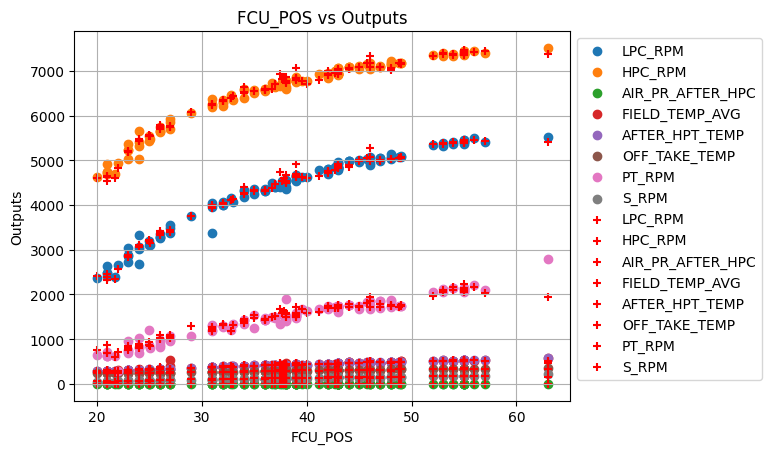

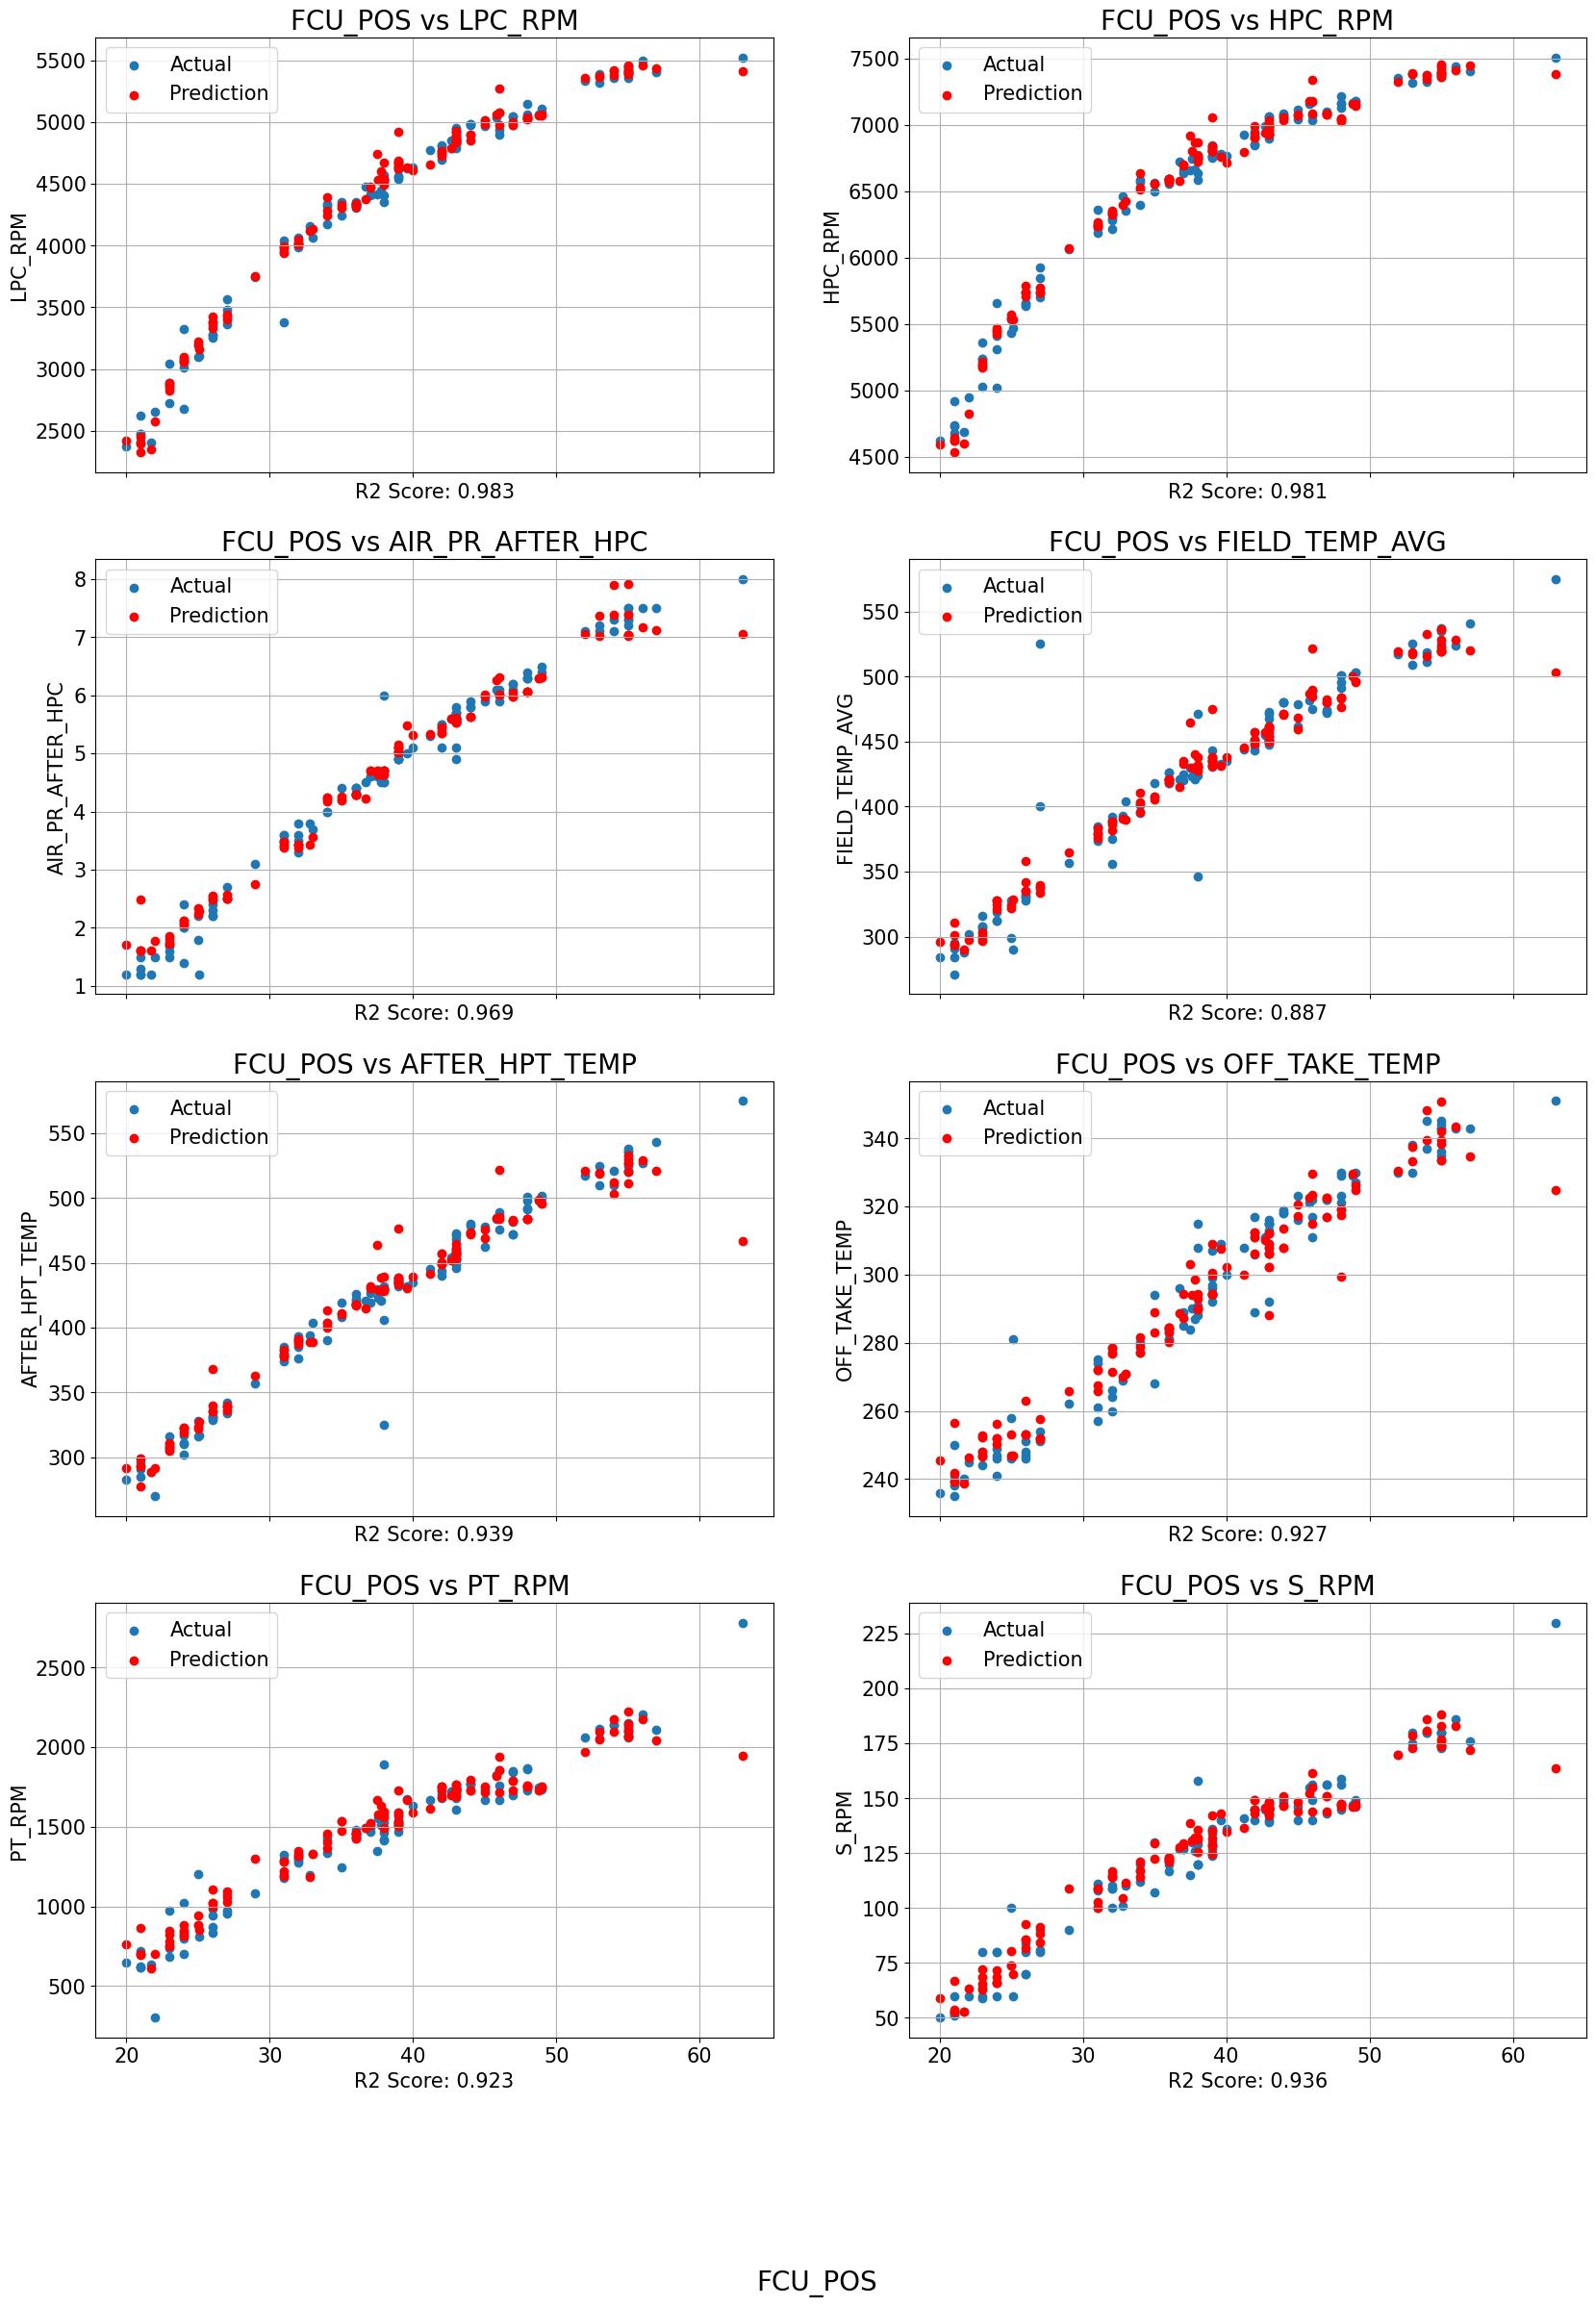

In [123]:
plot_models(test_y,best_model_pred)

### Saving the model for later use

In [124]:
import pickle
# from google.colab import drive
# drive.mount('/content/drive')

# path = '/content/drive/MyDrive/Colab Notebooks/Project/'
path = './assets/'
if choice == 1:
  model_file = "rf_model1.pkl"
elif choice == 2:
  model_file = "xgb_model1.pkl"


# save model
pickle.dump(best_model, open(path+model_file, "wb"))

### Neural Networks

In [125]:
import tensorflow as tf

# Now, let's create a neural network using TensorFlow Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6)  # Output layer with 6 neurons for your 6 outputs
])
 
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
 
# Train the model
model.fit(train_x, train_y, epochs=50, batch_size=32, validation_data=(test_x, test_y))
 
# Evaluate the model on the test set
nn_predictions = model.predict(test_x)
nn_r2 = r2_score(test_y, nn_predictions)
print(f"Neural Network R2 Score: {nn_r2}")

ModuleNotFoundError: No module named 'distutils'

# **SLIP Calculation**

In [153]:
x_data = df_sort['HPC_RPM']
y1 = df_sort['LPC_RPM']
y2 = df_sort['AIR_PR_AFTER_HPC']
y3 = df_sort['AFTER_HPT_TEMP']


In [ ]:
figure, axis = plt.subplots(3, 1, sharex=True, figsize=(12, 15))  # set dpi=300 later for presentation/ thesis
figure.supxlabel('HPC_RPM', fontsize=20)
m1, b1 = np.polyfit(x_data, y1, 1)
m2, b2 = np.polyfit(x_data, y2, 1)
m3, b3 = np.polyfit(x_data, y3, 1)

# Index the axis array using a single index
axis[0].scatter(x_data, y1, color='blue')
axis[0].plot(x_data, m1 * x_data + b1, color='red', label='Best Fit Line')
axis[0].set_title('HPC_RPM vs LPC_RPM', size=20)
axis[0].set_ylabel('LPC_RPM', fontsize=15)
axis[0].tick_params(axis='both', labelsize=15)
axis[0].grid()
axis[0].legend(fontsize=15)

axis[1].scatter(x_data, y2, color='blue')
axis[1].plot(x_data, m2 * x_data + b2, color='red', label='Best Fit Line')
axis[1].set_title('HPC_RPM vs AIR_PR_AFTER_HPC', size=20)
axis[1].set_ylabel('AIR_PR_AFTER_HPC', fontsize=15)
axis[1].tick_params(axis='both', labelsize=15)
axis[1].grid()
axis[1].legend(fontsize=15)

axis[2].scatter(x_data, y3, color='blue')
axis[2].plot(x_data, m3 * x_data + b3, color='red', label='Best Fit Line')
axis[2].set_title('HPC_RPM vs AFTER_HPT_TEMP', size=20)
axis[2].set_ylabel('AFTER_HPT_TEMP', fontsize=15)
axis[2].tick_params(axis='both', labelsize=15)
axis[2].grid()
axis[2].legend(fontsize=15)

plt.tight_layout()  # Adjust subplot layout to make room for supxlabel
plt.show()


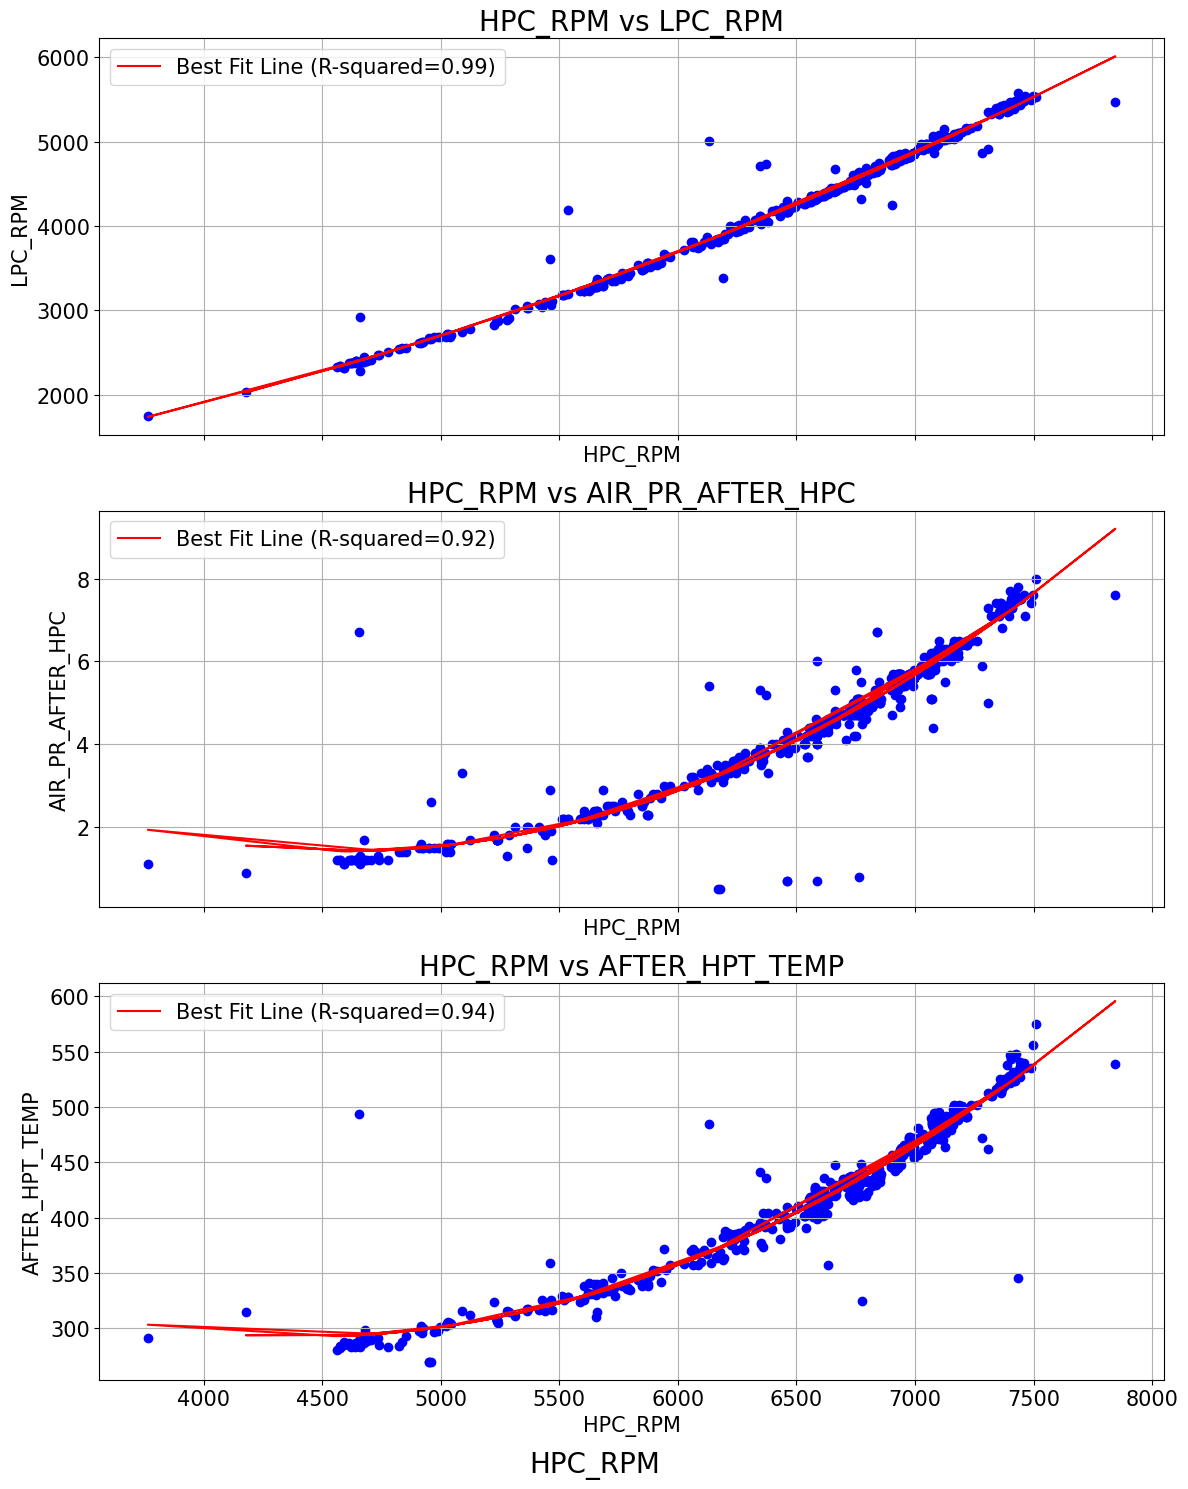

In [179]:
# Create a figure and axis object
figure, axis = plt.subplots(3, 1, sharex=True, figsize=(12, 15))  # set dpi=300 later for presentation/ thesis
figure.supxlabel('HPC_RPM', fontsize=20)

# Fit a 2nd degree polynomial and calculate R-squared for each plot
p1 = np.polyfit(x_data, y1, 2)
y_pred1 = np.polyval(p1, x_data)
r_squared1 = 1 - np.sum((y1 - y_pred1)**2) / np.sum((y1 - np.mean(y1))**2)

p2 = np.polyfit(x_data, y2, 2)
y_pred2 = np.polyval(p2, x_data)
r_squared2 = 1 - np.sum((y2 - y_pred2)**2) / np.sum((y2 - np.mean(y2))**2)

p3 = np.polyfit(x_data, y3, 2)
y_pred3 = np.polyval(p3, x_data)
r_squared3 = 1 - np.sum((y3 - y_pred3)**2) / np.sum((y3 - np.mean(y3))**2)

# Plot and annotate each subplot
for i, (y_data, y_pred, r_squared) in enumerate(zip([y1, y2, y3], [y_pred1, y_pred2, y_pred3], [r_squared1, r_squared2, r_squared3])):
    axis[i].scatter(x_data, y_data, color='blue')
    axis[i].plot(x_data, y_pred, color='red', label=f'Best Fit Line (R-squared={r_squared:.2f})')

    if i == 0:
        axis[i].set_title('HPC_RPM vs LPC_RPM', size=20)
        axis[i].set_ylabel('LPC_RPM', fontsize=15)
    elif i == 1:
        axis[i].set_title('HPC_RPM vs AIR_PR_AFTER_HPC', size=20)
        axis[i].set_ylabel('AIR_PR_AFTER_HPC', fontsize=15)
    elif i == 2:
        axis[i].set_title('HPC_RPM vs AFTER_HPT_TEMP', size=20)
        axis[i].set_ylabel('AFTER_HPT_TEMP', fontsize=15)

    axis[i].set_xlabel('HPC_RPM', fontsize=15)
    axis[i].tick_params(axis='both', labelsize=15)
    axis[i].grid()
    axis[i].legend(fontsize=15)

plt.tight_layout()  # Adjust subplot layout to make room for supxlabel
plt.show()

In [ ]:
df.plot.scatter(x='HPC_RPM',y='AFTER_HPT_TEMP')
df.plot.scatter(x='HPC_RPM',y='AIR_PR_AFTER_HPC')

In [185]:
print(df['FCU_POS'].min(), df['FCU_POS'].max())

20.0 64.0


/var/folders/3w/lb2b87552d5dc9bvztm53xk40000gn/T/ipykernel_1292/272426161.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_ex['INLET_AIR_TEMP'].fillna(40, inplace=True, limit=100)
/var/folders/3w/lb2b87552d5dc9bvztm53xk40000gn/T/ipykernel_1292/272426161.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


,FCU_POS,INLET_AIR_TEMP,LPC_RPM,HPC_RPM,AIR_PR_AFTER_HPC,FIELD_TEMP_AVG,AFTER_HPT_TEMP,OFF_TAKE_TEMP,PT_RPM,S_RPM
0,20.00,40,2440.048096,4666.000977,2.692,379.359985,378.989990,281.653015,1119.182007,92.670998
1,20.44,40,2440.048096,4666.000977,2.692,379.359985,378.989990,281.653015,1119.182007,92.670998
2,20.89,40,2440.048096,4666.000977,2.692,379.359985,378.989990,281.653015,1119.182007,92.670998
3,21.33,40,2440.048096,4666.000977,2.692,379.359985,378.989990,281.653015,1119.182007,92.670998
4,21.78,40,2389.899902,4644.403809,2.695,375.630005,375.002014,281.167999,1028.845947,92.780998
...,...,...,...,...,...,...,...,...,...,...
95,62.22,40,5453.605957,7422.686035,8.147,589.129028,552.849976,367.440002,2360.236084,203.341003
96,62.67,40,5453.605957,7422.686035,8.147,589.129028,552.849976,367.440002,2360.236084,203.341003
97,63.11,40,5453.605957,7422.686035,8.147,589.129028,552.849976,367.440002,2360.236084,203.341003
98,63.56,40,5453.605957,7422.686035,8.147,589.129028,552.849976,367.440002,2360.236084,203.341003


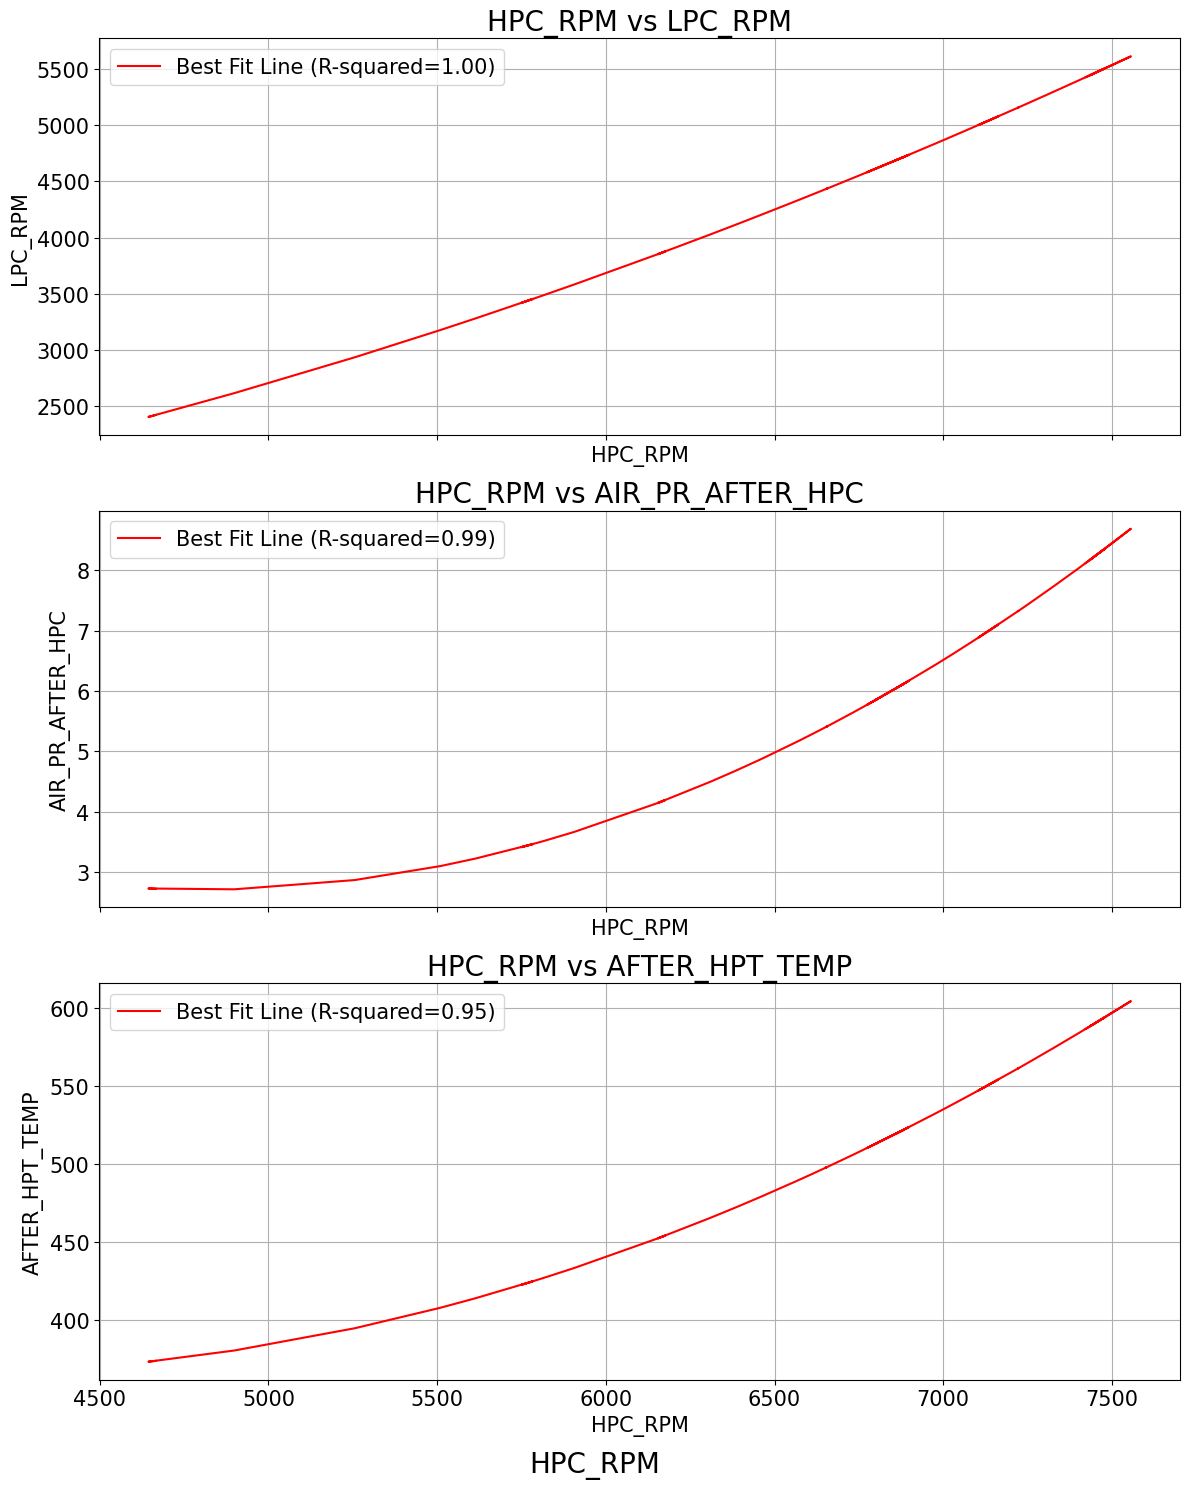

In [184]:
test_ex = pd.DataFrame(columns = input_cols)
final_results = pd.DataFrame(columns = input_cols+output_cols)
fcu_pos = np.round(np.linspace(df['FCU_POS'].min(), df['FCU_POS'].max(), 100), decimals=2)
test_ex['FCU_POS'] = fcu_pos
test_ex['INLET_AIR_TEMP'].fillna(40, inplace=True, limit=100)
final_results['FCU_POS'] = test_ex['FCU_POS']
final_results['INLET_AIR_TEMP'] = test_ex['INLET_AIR_TEMP']

case_pred = best_model.predict(test_ex)
final_results['LPC_RPM'] = case_pred[:, 0]
final_results['HPC_RPM'] = case_pred[:, 1]
final_results['AIR_PR_AFTER_HPC'] = case_pred[:, 2]
final_results['FIELD_TEMP_AVG'] = case_pred[:, 3]
final_results['AFTER_HPT_TEMP'] = case_pred[:, 4]
final_results['OFF_TAKE_TEMP'] = case_pred[:, 5]
final_results['PT_RPM'] = case_pred[:, 6]
final_results['S_RPM'] = case_pred[:, 7]
final_results[output_cols] = final_results[output_cols].round(3)
display(final_results)

x_data = final_results['HPC_RPM']
y1 = final_results['LPC_RPM']
y2 = final_results['AIR_PR_AFTER_HPC']
y3 = final_results['AFTER_HPT_TEMP']

# Create a figure and axis object
figure, axis = plt.subplots(3, 1, sharex=True, figsize=(12, 15))  # set dpi=300 later for presentation/ thesis
figure.supxlabel('HPC_RPM', fontsize=20)

# Fit a 2nd degree polynomial and calculate R-squared for each plot
p1 = np.polyfit(x_data, y1, 2)
y_pred1 = np.polyval(p1, x_data)
r_squared1 = 1 - np.sum((y1 - y_pred1)**2) / np.sum((y1 - np.mean(y1))**2)

p2 = np.polyfit(x_data, y2, 2)
y_pred2 = np.polyval(p2, x_data)
r_squared2 = 1 - np.sum((y2 - y_pred2)**2) / np.sum((y2 - np.mean(y2))**2)

p3 = np.polyfit(x_data, y3, 2)
y_pred3 = np.polyval(p3, x_data)
r_squared3 = 1 - np.sum((y3 - y_pred3)**2) / np.sum((y3 - np.mean(y3))**2)

# Plot and annotate each subplot
for i, (y_data, y_pred, r_squared) in enumerate(zip([y1, y2, y3], [y_pred1, y_pred2, y_pred3], [r_squared1, r_squared2, r_squared3])):
    axis[i].scatter(x_data, y_data, color='blue')
    axis[i].plot(x_data, y_pred, color='red', label=f'Best Fit Line (R-squared={r_squared:.2f})')

    if i == 0:
        axis[i].set_title('HPC_RPM vs LPC_RPM', size=20)
        axis[i].set_ylabel('LPC_RPM', fontsize=15)
    elif i == 1:
        axis[i].set_title('HPC_RPM vs AIR_PR_AFTER_HPC', size=20)
        axis[i].set_ylabel('AIR_PR_AFTER_HPC', fontsize=15)
    elif i == 2:
        axis[i].set_title('HPC_RPM vs AFTER_HPT_TEMP', size=20)
        axis[i].set_ylabel('AFTER_HPT_TEMP', fontsize=15)

    axis[i].set_xlabel('HPC_RPM', fontsize=15)
    axis[i].tick_params(axis='both', labelsize=15)
    axis[i].grid()
    axis[i].legend(fontsize=15)

plt.tight_layout()  # Adjust subplot layout to make room for supxlabel
plt.show()